#  **Inversiones inmobiliarias para alquiler vacacional - Paris, Île-de-France, France**

#### Author: Lina María Gómez Mesa

Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es
ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma AirBnb. A continuación, se muestra el trabajo realizado con el fin de ayudar a dos inversiones a saber en qué invertir en AirBnB.

**Dataset:** AirBnb Listings - Paris, Île-de-France, France [[dataset](https://insideairbnb.com/paris/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

## **TABLA DE CONTENIDO**
1. [Selección del dataset de trabajo](###1-Dataset-selection)
2. [Entendimiento inicial de datos](###2-Data-understanding)
    - 2.1. [Carga de los datos](####2.1-Imports)
    - 2.2. [Tipo de datos](####2.2-Type-of-data)
    - 2.3. [Reporte general](####2.3-Report)
    - 2.4. [Análisis univariado](####2.4-Univariate-Analysis)
        - 2.4.1 [Precio](#####2.4.1-Price)
        - 2.4.2 [Room type](#####2.4.2-Room-type)
        - 2.4.3 [Neighborhood](#####2.4.3-Neighborhood)
        - 2.4.4 [Availability-365](#####2.4.4-Availability-365)
3. [ Estrategia de análisis](###3-Analysis-strategy)
4. [Desarrollo de la estrategia](###4-Strategy-development)
    - 4.1 [Análisis descriptivo](####4.1-Analisis-descriptivo)
        - 4.1.1 [Variables numéricas](#####4.1.1-Numeric-variables)
        - 4.1.2 [Variables categóricas](#####4.1.2-Categorical-variables)
    - 4.2 [Data visualization](####4.2-Data-visualizations)
        - 4.2.1 [Bivariate room](#####4.2.1-Room-bivariate)
        - 4.2.2 [Bivariate neighborhood](#####4.2.2-Neighborhood-bivariate)
        - 4.2.3 [Bivariate accommodates](#####4.2.3-Accommodates-bivariate)
    - 4.3 [Pruebas de hipótesis](####4.3-Pruebas-de-hipotesis)
        - 4.3.1 [Test room](#####4.3.1-Room-test)
        - 4.3.2 [Test neighborhood](#####4.3.2-Neighborhood-test)
        - 4.3.3 [Test accommodate](#####4.3.3-Accommodate-test)
5. [Generación de resultados](###5-Result-generation)

### **1-Dataset-selection**
Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es
ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma AirBnb. En esta ocasión, se decidió seleccionar como ciudad a $\textbf{Paris, Île-de-France, France}$. 

<div align="center">
    <img src="utils/paris.png" alt="Paris">
</div>


### **2-Data-understanding**

#### **2.1-Imports**

Se realiza la importación de las librerías necesarias para realizar el análisis preliminar.

In [134]:
##############################
# IMPORTS
##############################
# Manejo de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Analisis profundo de datos
from ydata_profiling import ProfileReport
import numpy as np
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn
import warnings
from scipy.stats import spearmanr

# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
warnings.filterwarnings("ignore")

In [2]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("Data/detailed_listings.csv")

# Showing dataframe dimensions
listings_df.shape
print(f"There are a total of {listings_df.shape[0]} rows and {listings_df.shape[1]} columns in the dataframe.")

There are a total of 95461 rows and 75 columns in the dataframe.


#### **2.2-Type-of-data**

In [3]:
# Showing column types
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95461 non-null  int64  
 1   listing_url                                   95461 non-null  object 
 2   scrape_id                                     95461 non-null  int64  
 3   last_scraped                                  95461 non-null  object 
 4   source                                        95461 non-null  object 
 5   name                                          95461 non-null  object 
 6   description                                   91385 non-null  object 
 7   neighborhood_overview                         48179 non-null  object 
 8   picture_url                                   95459 non-null  object 
 9   host_id                                       95461 non-null 

In [4]:
numerical_columns = listings_df.select_dtypes(include=['int64', 'float64']).columns
print(f"Total of numerical columns: {listings_df.select_dtypes(include=['int64', 'float64']).shape[1]}")
categorical_columns = listings_df.select_dtypes(include=['object']).columns
print(f"Total of categorical columns: {listings_df.select_dtypes(include=['object']).shape[1]}")

assert listings_df.shape[1] == listings_df.select_dtypes(include=['int64', 'float64']).shape[1] + listings_df.select_dtypes(include=['object']).shape[1]

Total of numerical columns: 40
Total of categorical columns: 35


In [5]:
# Showing a sample of n rows
listings_df.sample(5)

id                                       listing_url  \
9939              11689344             https://www.airbnb.com/rooms/11689344   
57538   946963017765450271   https://www.airbnb.com/rooms/946963017765450271   
80797  1133070062655576613  https://www.airbnb.com/rooms/1133070062655576613   
28268             39439745             https://www.airbnb.com/rooms/39439745   
43400   704883099205664667   https://www.airbnb.com/rooms/704883099205664667   

            scrape_id last_scraped           source  \
9939   20240906025355   2024-09-06  previous scrape   
57538  20240906025355   2024-09-11      city scrape   
80797  20240906025355   2024-09-07  previous scrape   
28268  20240906025355   2024-09-07  previous scrape   
43400  20240906025355   2024-09-10      city scrape   

                                                    name  \
9939            Appartement pres du chateau de Vincennes   
57538        Chambre dans le calme et animé Ménilmontant   
80797  Nid d'amour à deux pas du Parc des Buttes-Chau...   
28268  Charmant 2 pièces avec terrasse plein sud (4pe...   
43400            Cosy flat - 1BR/4P - Porte de Montreuil   

                                             description  \
9939   Comfortable apartment, near the Château and th...   
57538  Welcome to the heart of Ménilmontant with stun...   
80797  Located in the 19th arrondissement, this cozy ...   
28268  With a surface of 35 m2, perfectly equipped fo...   
43400  Checkmyguest offers you this attractive 45 m2 ...   

                                   neighborhood_overview  \
9939   The neighborhood is very nice, with a large wo...   
57538       Very lively area and located in a quiet area   
80797  The 19th arrondissement is a district of Paris...   
28268  The convention set metro station is a 10-minut...   
43400  The Charonne district of Paris offers a fascin...   

                                             picture_url    host_id  \
9939   https://a0.muscache.com/pictures/753a0d7b-5a8c...   42370411   
57538  https://a0.muscache.com/pictures/miso/Hosting-...   38784081   
80797  https://a0.muscache.com/pictures/prohost-api/H...  571224641   
28268  https://a0.muscache.com/pictures/ca1b886d-99b3...  302937490   
43400  https://a0.muscache.com/pictures/prohost-api/H...  477217975   

                                          host_url     host_name  host_since  \
9939    https://www.airbnb.com/users/show/42370411        Michel  2015-08-24   
57538   https://www.airbnb.com/users/show/38784081          Rudy  2015-07-17   
80797  https://www.airbnb.com/users/show/571224641        Pierre  2024-04-08   
28268  https://www.airbnb.com/users/show/302937490         Alain  2019-10-17   
43400  https://www.airbnb.com/users/show/477217975  Checkmyguest  2022-08-29   

           host_location                                         host_about  \
9939   Vincennes, France                                                NaN   
57538      Paris, France  Passionné de voyage, j'ai fait pas mal de pays...   
80797      Paris, France  Bonjour ! \nJe m’appelle Pierre et suis un gra...   
28268                NaN                                                NaN   
43400                NaN                                                NaN   

       host_response_time host_response_rate host_acceptance_rate  \
9939                  NaN                NaN                  NaN   
57538  a few days or more                 0%                  21%   
80797      within an hour               100%                  67%   
28268                 NaN                NaN                  NaN   
43400      within an hour               100%                 100%   

      host_is_superhost                                 host_thumbnail_url  \
9939                  f  https://a0.muscache.com/im/users/42370411/prof...   
57538                 f  https://a0.muscache.com/im/users/38784081/prof...   
80797                 f  https://a0.muscache.com/im/pictures/user/a6dc9...   
28268              

#### **2.3-Report**

Se genera un reporte inicial para ver de las 75 variables cuáles son relevantes para los inversores. Este es: [Profiling Report](Docs/profiling.html)


In [ ]:
# pandas_profiling.ProfileReport(listings_df)
profiling = ProfileReport(listings_df.copy())
profiling.to_file("Docs/profiling.html")

Luego de revisar el reporte generado por PandasProfiling, se considera las siguientes las variables más relevantes:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **room_type** | [Entire home/apt,Private room,Shared room,Hotel] |
| **price** | Daily price in local currency|
| **availability_365** | The availability of the listing x days in the future as determined by the calendar. |
| **number_of_reviews** | The number of reviews the listing has|
| **neighbourhood_cleansed** | The neighbourhood as geocoded using the latitude and longitude against neighborhoods. |
| **accommodates** | The maximum capacity of the listing. |
| **license** | The licence permit, registration number. |
| **property_type** | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field. |
| **amenities** | features or services that enhance the comfort, convenience, or enjoyment of a space, facility, or community|
| **review_scores_rating** | Score given to the place |
| **review_scores_location** | Score given to the location |
| **minimum_nights** | minimum number of night stay for the listing (calendar rules may be different) |

In [6]:
filtered_df = listings_df[["room_type", "price", "availability_365", "number_of_reviews", "neighbourhood_cleansed", "accommodates", "license", "amenities", "property_type", "review_scores_rating", "review_scores_location", "minimum_nights"]]

In [7]:
filtered_numerical_columns = filtered_df.select_dtypes(include=['int64', 'float64']).columns
print(f"Total of numerical columns: {filtered_df.select_dtypes(include=['int64', 'float64']).shape[1]}")
filtered_categorical_columns = filtered_df.select_dtypes(include=['object']).columns
print(f"Total of categorical columns: {filtered_df.select_dtypes(include=['object']).shape[1]}")

Total of numerical columns: 6
Total of categorical columns: 6


Se observa cuáles de las columnas presentan valores nulos.

In [8]:
# checking for missing values and normalizing the data
(round((filtered_df.isnull().sum()/filtered_df.shape[0])*100,2)).sort_values(ascending=False)

price                     32.72
review_scores_location    28.45
review_scores_rating      28.43
license                   20.37
number_of_reviews          0.00
availability_365           0.00
room_type                  0.00
neighbourhood_cleansed     0.00
amenities                  0.00
accommodates               0.00
property_type              0.00
minimum_nights             0.00
dtype: float64

Después se volvió a realizar un segundo filtro para únicamente seleccionar 5 variables candidatas. Estas fueron:

1. **Room_type:** El tipo de cuarto puede influir en el atractivo de un alojamiento para los turistas y en los ingresos por alquiler que obtengan los inversores.
2. **Price:** Este es un factor crucial, ya que afecta directamente los ingresos potenciales y la rentabilidad de un Airbnb. Dado que el objetivo para el inversor es maximizar su número de ganancias esta variable es crucial.
3. **Availability_365:** This variable indicates the number of days a listing is available for booking throughout the year. It is a direct measure of occupancy potential, which is key for generating rental income.
4. **Neighborhood_cleansed:** El barrio es importante dado que dependiendo del barrio este puede influir en la seguridad y qué tan cerca se encuentra el airbnb a lugares turísticos.
5. **Accomodates:** La capacidad de alojamiento es un factor clave para atraer y satisfacer a los huéspedes, además de influir en las tarifas y la rentabilidad de una propiedad.

#### **2.4-Univariate-Analysis**

##### **2.4.1-Price**

In [9]:
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

[]

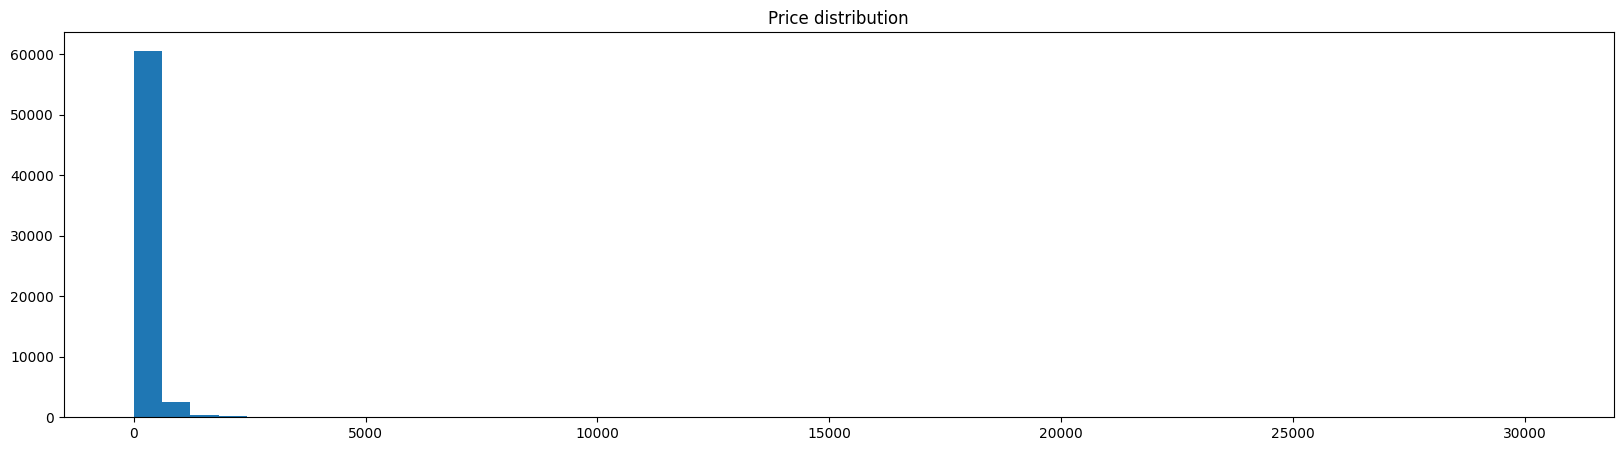

In [10]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [11]:
# calculo de los cuartiles y outliers
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers_below = listings_df["price_float"] < lower_bound
outliers_above = listings_df["price_float"] > upper_bound
total_outliers = outliers_below.sum() + outliers_above.sum()

print(f"Total number of outliers: {total_outliers}")
print(f"Percentage of outliers: {round(total_outliers/listings_df.shape[0]*100, 2)}%")

Lower bound: -126.5
Upper bound: 485.5
Total number of outliers: 5770
Percentage of outliers: 6.04%


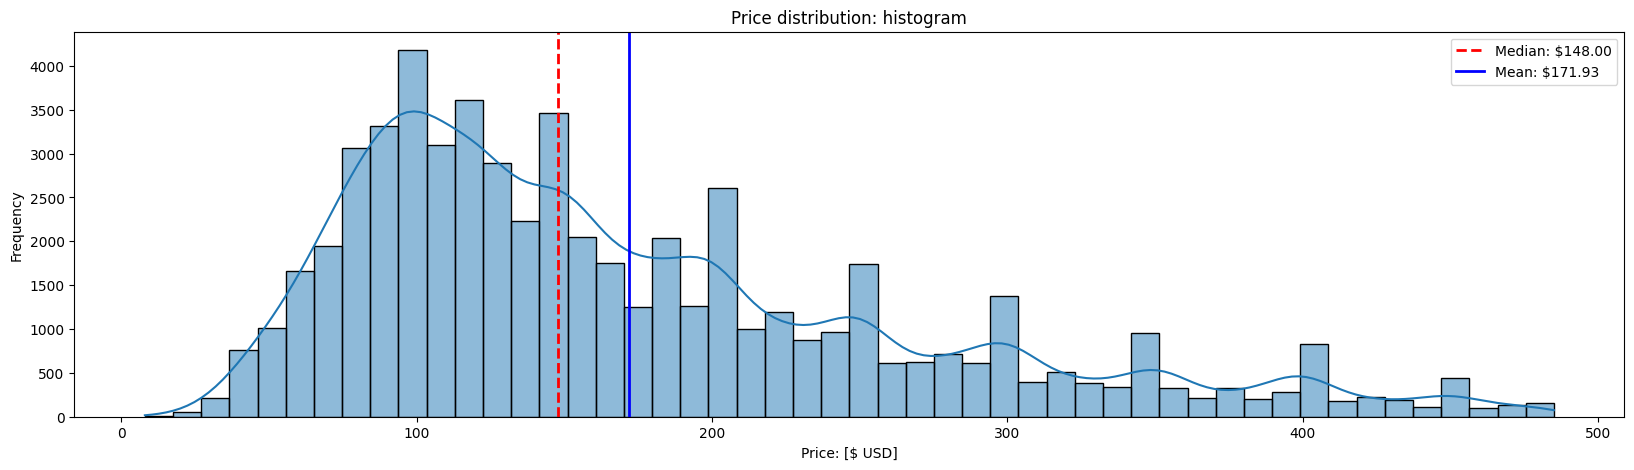

In [12]:
# calcular la variable media y mediana
median_price = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"].median()
mean_price = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"].mean()

# grafica de la distribucion de precios
plt.figure(figsize=(20, 5))
sns.histplot(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50, kde=True)
plt.axvline(median_price, color='r', linestyle='--', linewidth=2, label=f'Median: ${median_price:.2f}')
plt.axvline(mean_price, color='b', linestyle='-', linewidth=2, label=f'Mean: ${mean_price:.2f}')

plt.xlabel("Price: [$ USD]")
plt.ylabel("Frequency")
plt.title("Price distribution: histogram")
plt.legend()
plt.show()

In [13]:
listings_df["price_float"].describe()

count    64230.000000
mean       256.023276
std        522.272191
min          8.000000
25%        103.000000
50%        155.000000
75%        256.000000
max      30400.000000
Name: price_float, dtype: float64

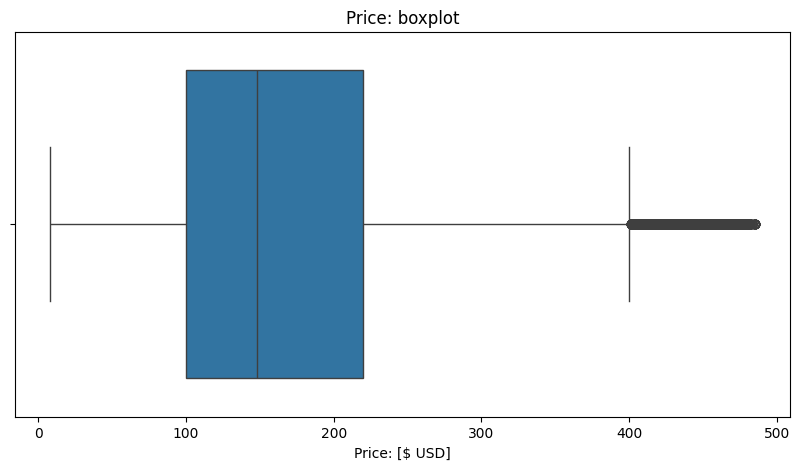

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"])
plt.xlabel("Price: [$ USD]")
plt.title("Price: boxplot")
plt.show()

##### **2.4.2-Room-type**

In [15]:
listings_df["room_type"].value_counts()

room_type
Entire home/apt    85268
Private room        9055
Hotel room           752
Shared room          386
Name: count, dtype: int64

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\4289013208.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="room_type", y="percentage", data=percentage_df_rt, palette="viridis")


Text(0, 0.5, 'Percentage')

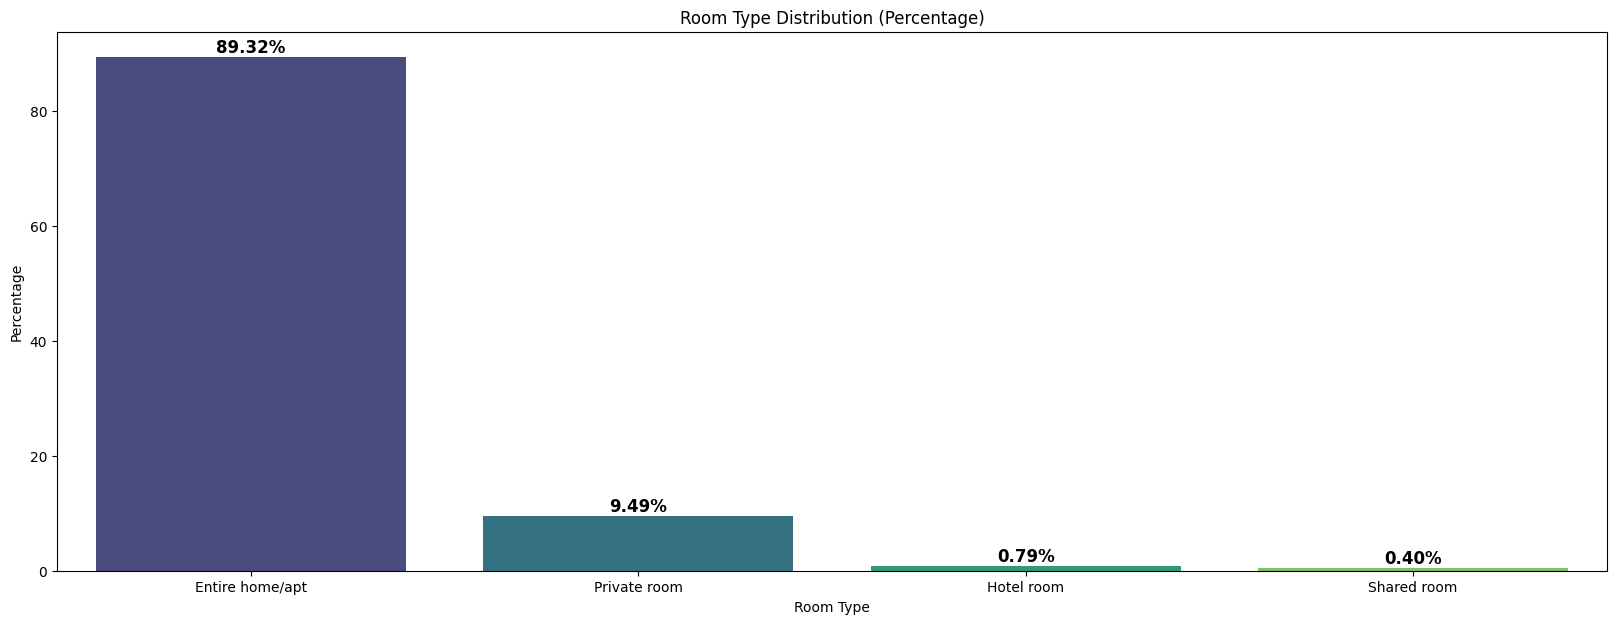

In [16]:
# se calculan los porcentajes de cada categoria
category_counts_rt = listings_df["room_type"].value_counts()
category_percentages_rt = (category_counts_rt / category_counts_rt.sum()) * 100

percentage_df_rt = category_percentages_rt.reset_index()
percentage_df_rt.columns = ["room_type", "percentage"]

plt.figure(figsize=(20, 7))
sns.barplot(x="room_type", y="percentage", data=percentage_df_rt, palette="viridis")
for index, row in percentage_df_rt.iterrows():
    plt.text(index, row["percentage"] + 0.8, f'{row["percentage"]:.2f}%', color='black', ha="center", fontsize=12, fontweight='bold')

plt.title("Room Type Distribution (Percentage)")
plt.xlabel("Room Type")
plt.ylabel("Percentage")

In [17]:
listings_df["room_type"].describe()

count               95461
unique                  4
top       Entire home/apt
freq                85268
Name: room_type, dtype: object

##### **2.4.3-Neighborhood**

In [18]:
listings_df["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Buttes-Montmartre      10532
Popincourt              8392
Vaugirard               7727
Batignolles-Monceau     6673
Entrepôt                6464
Passy                   6225
Buttes-Chaumont         5387
Ménilmontant            5183
Opéra                   4652
Reuilly                 3988
Temple                  3908
Observatoire            3603
Gobelins                3274
Bourse                  3137
Panthéon                3026
Élysée                  2965
Hôtel-de-Ville          2857
Luxembourg              2724
Palais-Bourbon          2702
Louvre                  2042
Name: count, dtype: int64

In [19]:
listings_df["neighbourhood_cleansed"].describe()

count                 95461
unique                   20
top       Buttes-Montmartre
freq                  10532
Name: neighbourhood_cleansed, dtype: object

In [20]:
category_counts_n = listings_df["neighbourhood_cleansed"].value_counts()
category_percentages_n = (category_counts_n / category_counts_n.sum()) * 100

percentage_df_n = category_percentages_n.reset_index()
percentage_df_n.columns = ["neighbourhood_cleansed", "percentage"]
percentage_df = percentage_df_n.sort_values("percentage", ascending=False)

# Crear gráfica de barras para la distribución de los neighborhoods
plt.figure(figsize=(12, 10))
sns.barplot(x="percentage", y="neighbourhood_cleansed", data=percentage_df_n, palette="dark")

for index, row in percentage_df_n.iterrows():
    plt.text(row["percentage"] - 1, index, f'{row["percentage"]:.2f}%', 
             color='white', va="center", ha="center", fontsize=10, fontweight='bold')

plt.title("Neighborhood Distribution (Percentage)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\2173573203.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="percentage", y="neighbourhood_cleansed", data=percentage_df_n, palette="dark")


##### **2.4.4-Availability-365**

[]

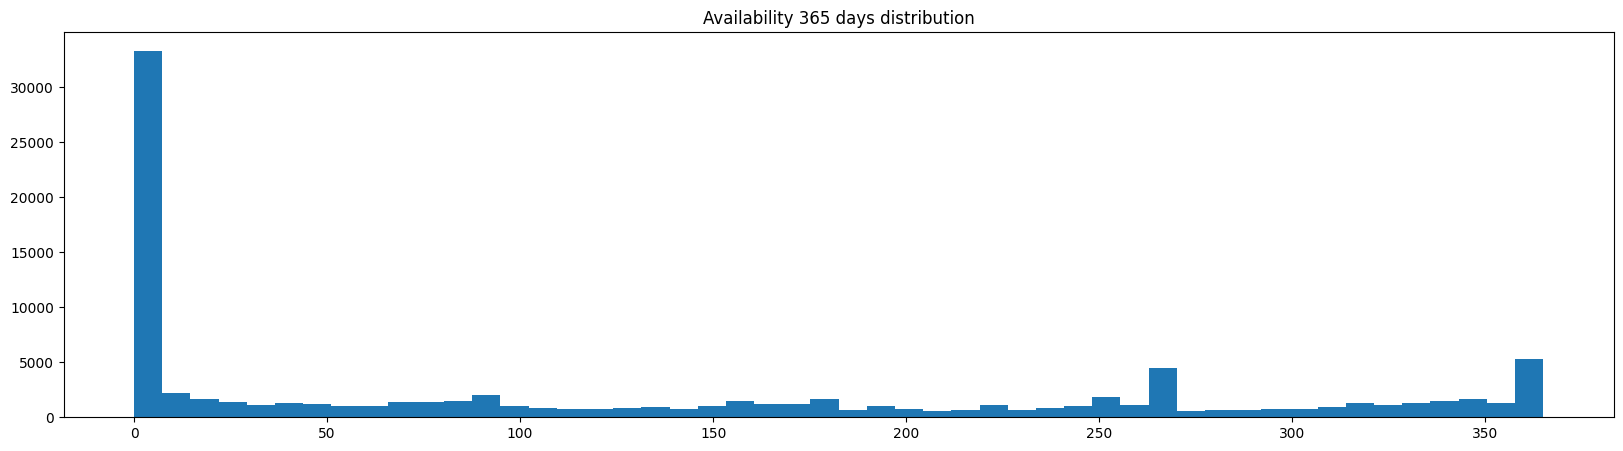

In [21]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["availability_365"], bins=50)
plt.title("Availability 365 days distribution")
plt.plot()

In [22]:
# calculo de los cuartiles y outliers
q1_a = listings_df["availability_365"].quantile(0.25)
q3_a = listings_df["availability_365"].quantile(0.75)
iqr_a = q3_a - q1_a
lower_bound_a = q1_a - 1.5*iqr_a
upper_bound_b = q3_a + 1.5*iqr_a
print(f"Lower bound: {lower_bound_a}")
print(f"Upper bound: {upper_bound_b}")

outliers_below_a = listings_df["availability_365"] < lower_bound_a
outliers_above_a = listings_df["availability_365"] > upper_bound_b
total_outliers_a = outliers_below_a.sum() + outliers_above_a.sum()

print(f"Total number of outliers: {total_outliers_a}")
print(f"Percentage of outliers: {round(total_outliers_a/listings_df.shape[0]*100, 2)}%")

Lower bound: -381.0
Upper bound: 635.0
Total number of outliers: 0
Percentage of outliers: 0.0%


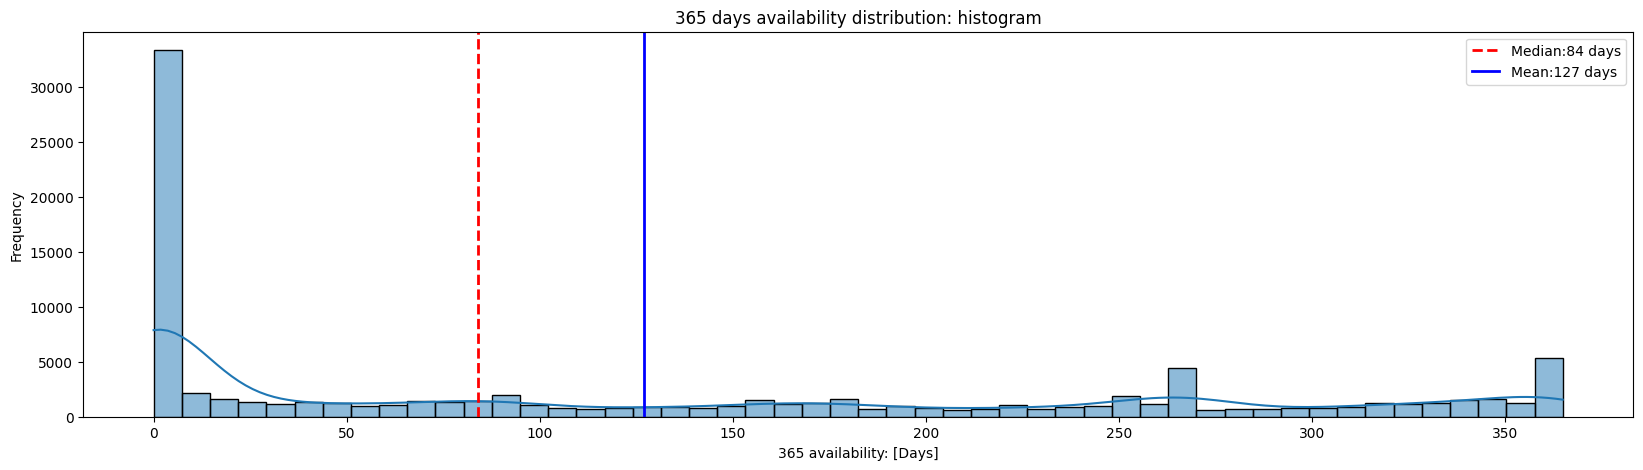

In [23]:
# calcular la variable media y mediana
median_price_a = listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"].median()
mean_price_a = listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"].mean()

# grafica de la distribucion de precios
plt.figure(figsize=(20, 5))
sns.histplot(listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"], bins=50, kde=True)
plt.axvline(median_price_a, color='r', linestyle='--', linewidth=2, label=f'Median:{median_price_a:.0f} days')
plt.axvline(mean_price_a, color='b', linestyle='-', linewidth=2, label=f'Mean:{mean_price_a:.0f} days')

plt.xlabel("365 availability: [Days]")
plt.ylabel("Frequency")
plt.title("365 days availability distribution: histogram")
plt.legend()
plt.show()

In [24]:
listings_df["availability_365"].describe()

count    95461.000000
mean       127.049518
std        130.788323
min          0.000000
25%          0.000000
50%         84.000000
75%        254.000000
max        365.000000
Name: availability_365, dtype: float64

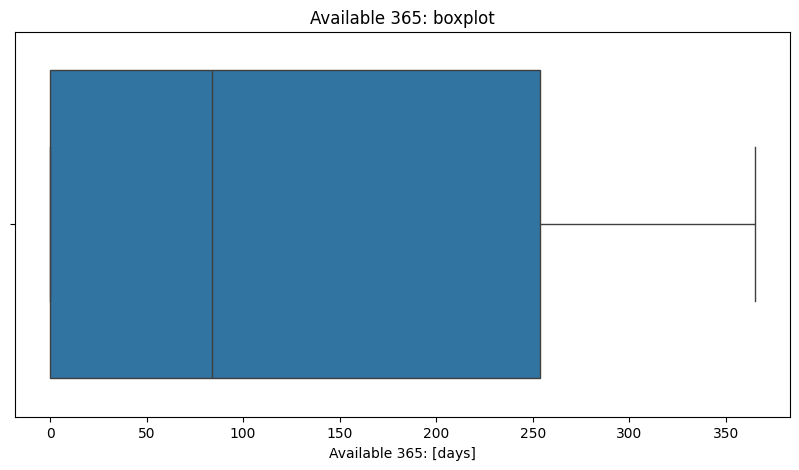

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=listings_df.loc[listings_df["availability_365"] <= (q3_a + 1.5 * iqr_a)]["availability_365"])
plt.xlabel("Available 365: [days]")
plt.title("Available 365: boxplot")
plt.show()

##### **2.4.5-Accommodates**

In [26]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["accommodates"], bins=50)
plt.title("Accommodates distribution")
plt.plot()

[]

In [27]:
# calculo de los cuartiles y outliers
q1_d = listings_df["accommodates"].quantile(0.25)
q3_d = listings_df["accommodates"].quantile(0.75)
iqr_d = q3_d - q1_d
lower_bound_d = q1_d - 1.5*iqr_d
upper_bound_d = q3_d + 1.5*iqr_d
print(f"Lower bound: {lower_bound_d}")
print(f"Upper bound: {upper_bound_d}")

outliers_below_d = listings_df["accommodates"] < lower_bound_d
outliers_above_d = listings_df["accommodates"] > upper_bound_d
total_outliers_d = outliers_below_d.sum() + outliers_above_d.sum()

print(f"Total number of outliers: {total_outliers_d}")
print(f"Percentage of outliers: {round(total_outliers_d/listings_df.shape[0]*100, 2)}%")

Lower bound: -1.0
Upper bound: 7.0
Total number of outliers: 2433
Percentage of outliers: 2.55%


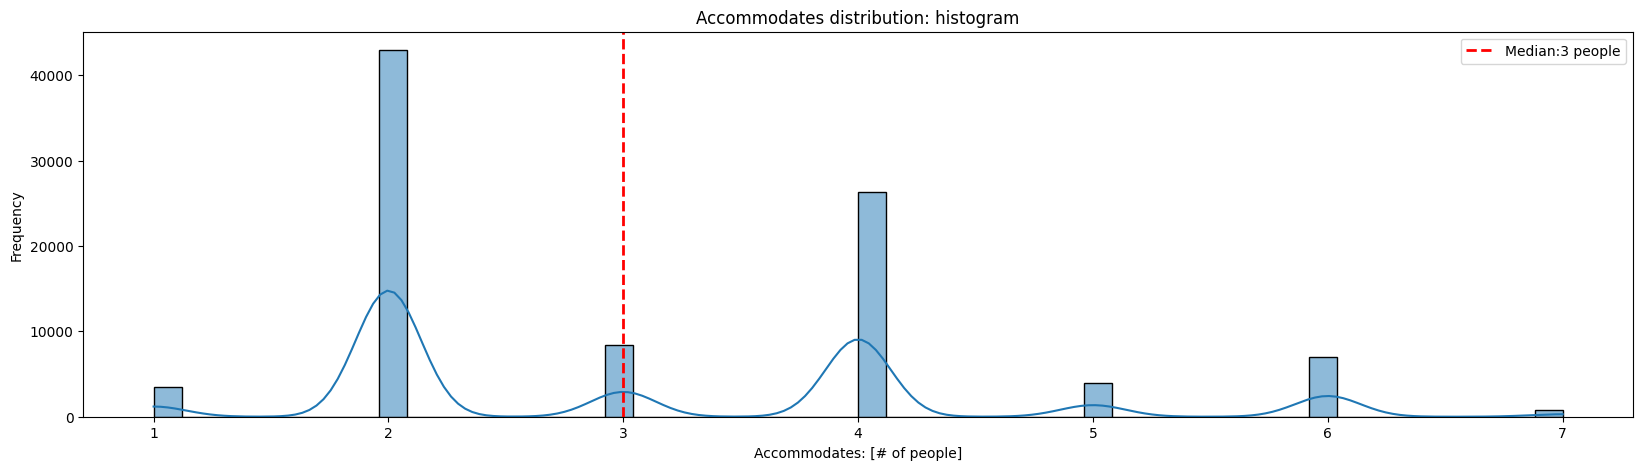

In [28]:
# calcular la variable media y mediana
median_price_d = listings_df.loc[listings_df["accommodates"] <= (q3_d + 1.5 * iqr_d)]["accommodates"].median()

# grafica de la distribucion de precios
plt.figure(figsize=(20, 5))
sns.histplot(listings_df.loc[listings_df["accommodates"] <= (q3_d + 1.5 * iqr_d)]["accommodates"], bins=50, kde=True)
plt.axvline(median_price_d, color='r', linestyle='--', linewidth=2, label=f'Median:{median_price_d:.0f} people')

plt.xlabel("Accommodates: [# of people]")
plt.ylabel("Frequency")
plt.title("Accommodates distribution: histogram")
plt.legend()
plt.show()

In [29]:
listings_df["accommodates"].describe()

count    95461.000000
mean         3.243890
std          1.658668
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

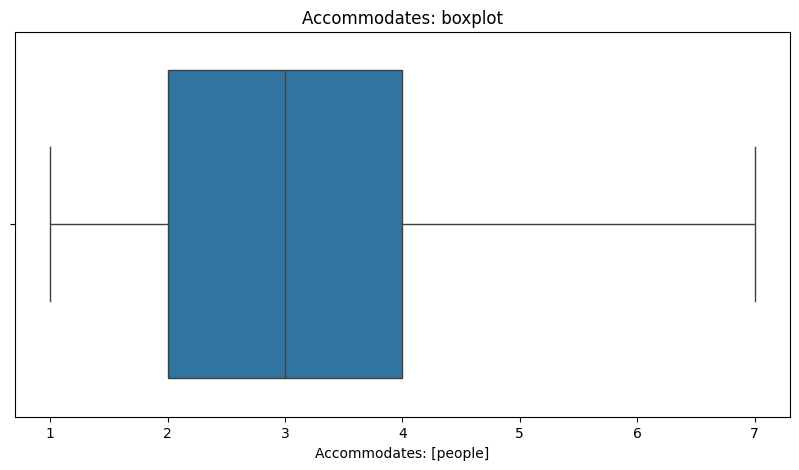

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=listings_df.loc[listings_df["accommodates"] <= (q3_d + 1.5 * iqr_d)]["accommodates"])
plt.xlabel("Accommodates: [people]")
plt.title("Accommodates: boxplot")
plt.show()

### **3-Analysis-strategy**

Describir de manera concreta en uno o dos párrafos la
estrategia de análisis y las técnicas que utilizará, con su respectiva justificación,
para dar respuesta al requerimiento de establecer la mejor opción de inversión
inmobiliaria. La estrategia debe contemplar desde el cálculo de estadísticos básicos
hasta el uso de técnicas gráficas que involucren varios atributos.

**Estrategia:** Como consultora de datos que está recomendando a los inversores en dónde invertir en Paris, se considerara una estrategia de tres pasos: 1) análisis descriptivo, 2) análisis visual (gráficos) y 3) pruebas de hipótesis.

1) **Análisis descriptivo:** Se calcularán estadísticos descriptivos como media, mediana, desviación estándar y cuartiles para variables numéricas clave como el precio, la capacidad de alojamiento (accommodates) y la disponibilidad anual (availability_365). Para las variables categóricas como el tipo de habitación y el tipo de propiedad, se examinará la moda y las frecuencias relativas. Esta exploración inicial permitirá comprender la distribución de los datos, identificar valores típicos y atípicos, y detectar posibles sesgos o tendencias en el mercado. Además, se analizará completitud, presencia de outliers y consistencia para las variables.

2)  **Data visualizations (gráficos):** Se emplearán gráficos de caja (boxplots) y/o gráficos de barras apilados para visualizar la distribución del precio en función del tipo de habitación y el tipo de propiedad. Esta técnica permitirá comparar visualmente los precios entre diferentes categorías, revelando diferencias en los rangos de precios y la dispersión de los datos, lo que ayudará a identificar los tipos de alojamiento más lucrativos. Finalmente, se construirán mapas de calor de correlaciones para examinar las relaciones entre todas las variables numéricas, incluyendo el precio, la disponibilidad y la capacidad de alojamiento.

3) **Pruebas de hipótesis:** Finalmente, se realizarán pruebas de hipótesis, como análisis de varianza (ANOVA) o Kruskal wallis y pruebas de pearson, para evaluar si existen diferencias significativas en el precio o ingresos según el tipo de habitación, el tipo de propiedad y la presencia de reseñas. Estas pruebas estadísticas proporcionarán evidencia sólida para respaldar las recomendaciones de inversión

<div align="center">
    <img src="utils/strategy.png" alt="Paris">
</div>


### **4-Strategy-development**

Implementar la estrategia previamente definida
en donde se evidencie claramente cualquier tipo de procesamiento de datos que
haya tenido que realizar, las técnicas estadísticas o de visualización de datos
utilizadas y los insights extraídos tras la interpretación de los resultados.


#### **4.1-Analisis-descriptivo**

In [31]:
final_df = listings_df[["room_type", "price_float", "availability_365", "neighbourhood_cleansed", "accommodates"]]
final_categorical_columns = final_df.select_dtypes(include=['object']).columns
final_numerical_columns = final_df.select_dtypes(include=['int64', 'float64']).columns

##### **4.1.1-Numeric-variables**

Se realiza en primer lugar para las **variables numéricas**:

In [32]:
print("ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES NUMÉRICAS")
for numcol in final_numerical_columns:
    print("\n","*"*50)
    print(f"Column: {numcol}\n")
    print(final_df[numcol].describe())

ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES NUMÉRICAS

 **************************************************
Column: price_float

count    64230.000000
mean       256.023276
std        522.272191
min          8.000000
25%        103.000000
50%        155.000000
75%        256.000000
max      30400.000000
Name: price_float, dtype: float64

 **************************************************
Column: availability_365

count    95461.000000
mean       127.049518
std        130.788323
min          0.000000
25%          0.000000
50%         84.000000
75%        254.000000
max        365.000000
Name: availability_365, dtype: float64

 **************************************************
Column: accommodates

count    95461.000000
mean         3.243890
std          1.658668
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64


In [33]:
for numcol in final_numerical_columns:
    print("\n","*"*50)
    print(f"Column: {numcol}\n")
    null_percentage = (final_df[numcol].isnull().sum() / len(final_df)) * 100
    print(f"Percentage of null values in '{numcol}': {null_percentage:.2f}%")


 **************************************************
Column: price_float

Percentage of null values in 'price_float': 32.72%

 **************************************************
Column: availability_365

Percentage of null values in 'availability_365': 0.00%

 **************************************************
Column: accommodates

Percentage of null values in 'accommodates': 0.00%


Además, se analiza la cantidad de outliers por variable.

In [34]:
for numcol in final_numerical_columns:
    
    q1 = final_df[numcol].quantile(0.25)
    q3 = final_df[numcol].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    print("\n","*"*50)
    print(f"Column: {numcol}\n")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")

    outliers_below = final_df[numcol] < lower_bound
    outliers_above = final_df[numcol] > upper_bound
    total_outliers = outliers_below.sum() + outliers_above.sum()

    print(f"Total number of outliers: {total_outliers}")
    print(f"Percentage of outliers: {round(total_outliers/final_df.shape[0]*100, 2)}%")


 **************************************************
Column: price_float

Lower bound: -126.5
Upper bound: 485.5
Total number of outliers: 5770
Percentage of outliers: 6.04%

 **************************************************
Column: availability_365

Lower bound: -381.0
Upper bound: 635.0
Total number of outliers: 0
Percentage of outliers: 0.0%

 **************************************************
Column: accommodates

Lower bound: -1.0
Upper bound: 7.0
Total number of outliers: 2433
Percentage of outliers: 2.55%


In [35]:
for numcol in final_numerical_columns:
    print("\n","*"*50)
    print(f"Column: {numcol}\n")
    skewness = final_df[numcol].skew()
    kurtosis = final_df[numcol].kurt()

    print(f'Skewness: {skewness}')
    print(f'Kurtosis: {kurtosis}')


 **************************************************
Column: price_float

Skewness: 17.24944293266076
Kurtosis: 507.76934861031293

 **************************************************
Column: availability_365

Skewness: 0.5240980806085118
Kurtosis: -1.257135748376427

 **************************************************
Column: accommodates

Skewness: 1.5941390725037592
Kurtosis: 4.555537502704274


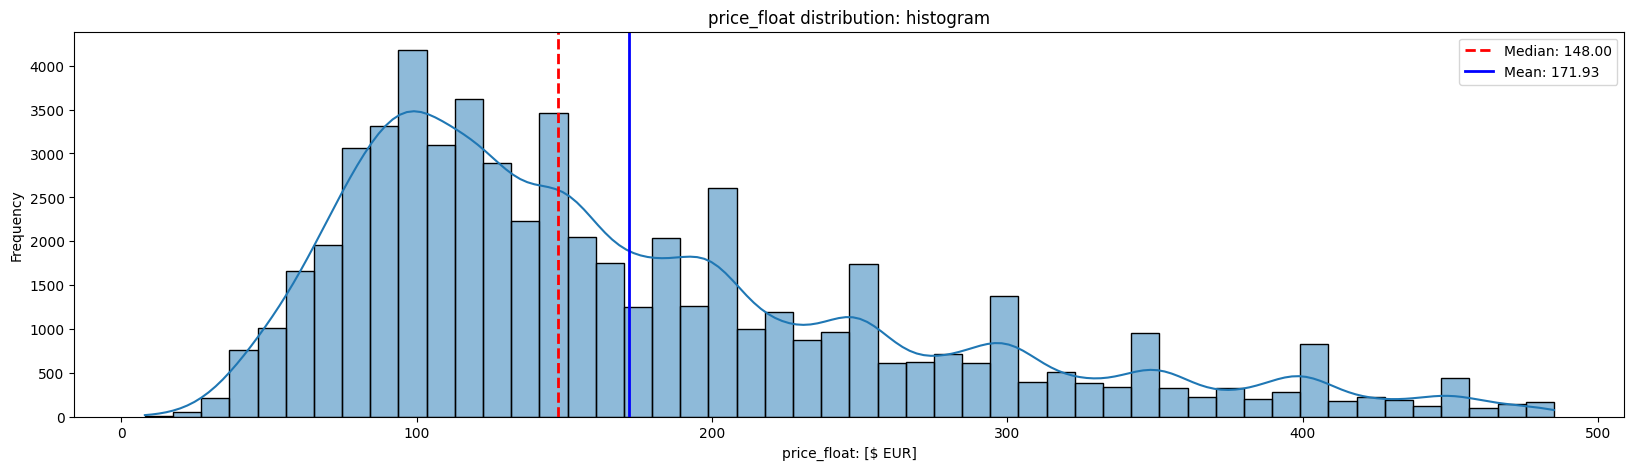

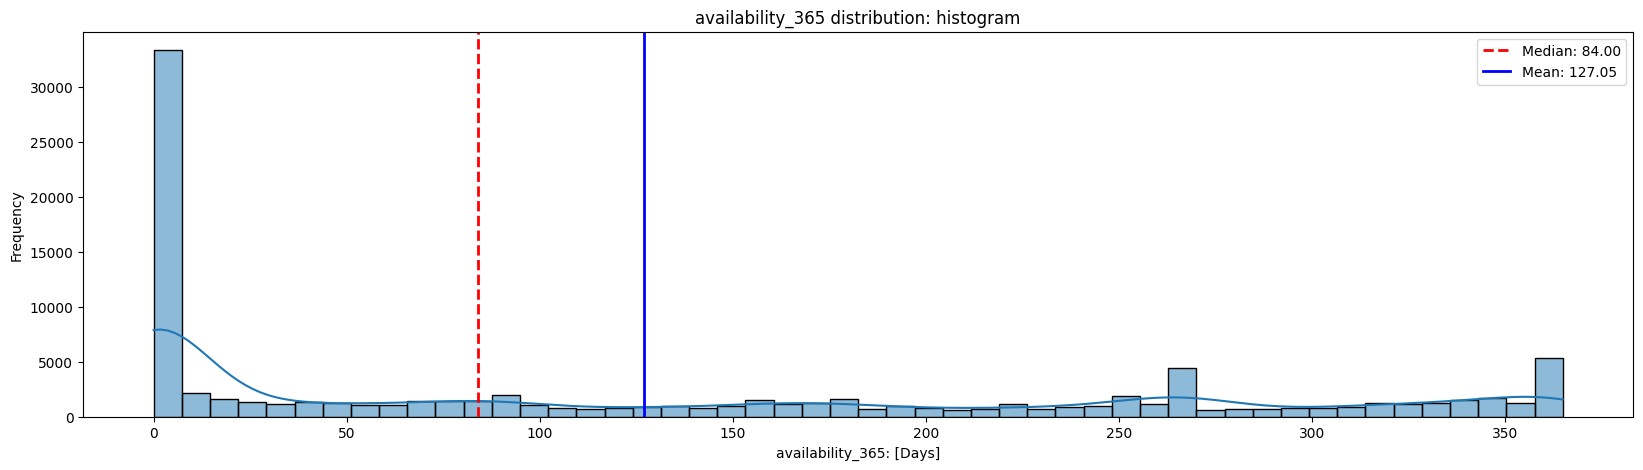

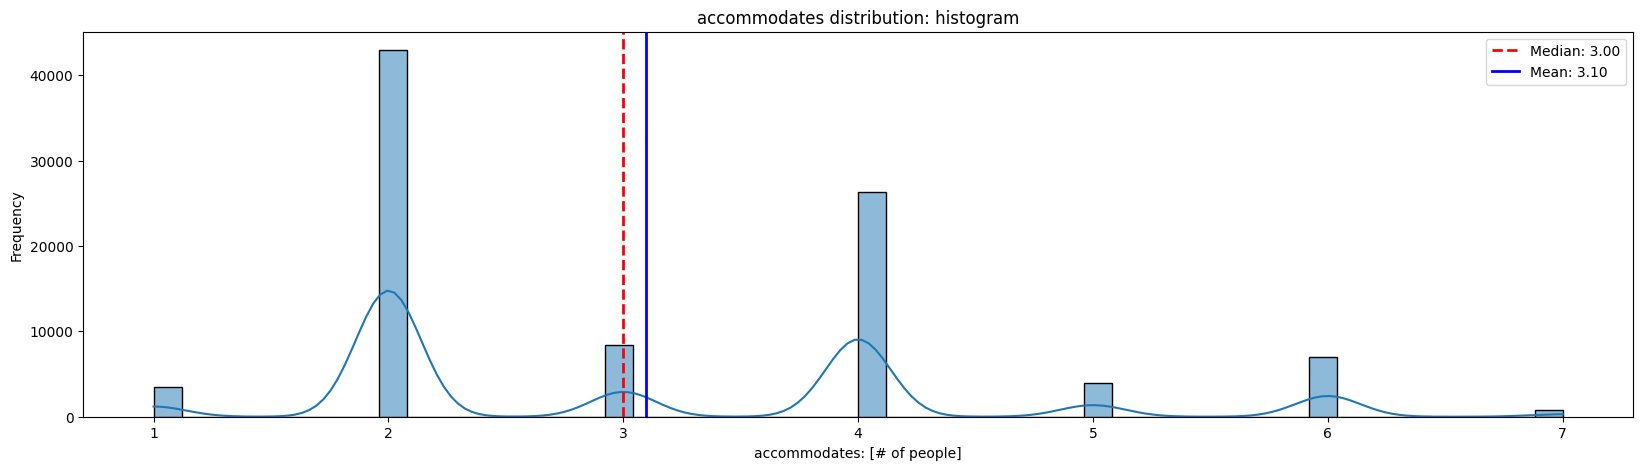

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
xlabel_l = ["[$ EUR]", "[Days]", "[# of people]"]
# Se realizan histogramas para cada variable numérica
i = 0
for col in final_numerical_columns:

    q1 = listings_df[col].quantile(0.25)
    q3 = listings_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    

    filtered_data = listings_df.loc[(listings_df[col] >= lower_bound) & (listings_df[col] <= upper_bound)][col]
    median_val = filtered_data.median()
    mean_val = filtered_data.mean()

    plt.figure(figsize=(20, 5))
    sns.histplot(filtered_data, bins=50, kde=True)
    plt.axvline(median_val, color='r', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.axvline(mean_val, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')

    plt.xlabel(f"{col}: {xlabel_l[i]}")
    plt.ylabel(f"Frequency")
    plt.title(f"{col} distribution: histogram")
    plt.legend()
    
    # Show the plot
    plt.show()
    i += 1


C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\196909843.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='minimum_nights', y='price_float', data=outliers_df, palette='pastel')


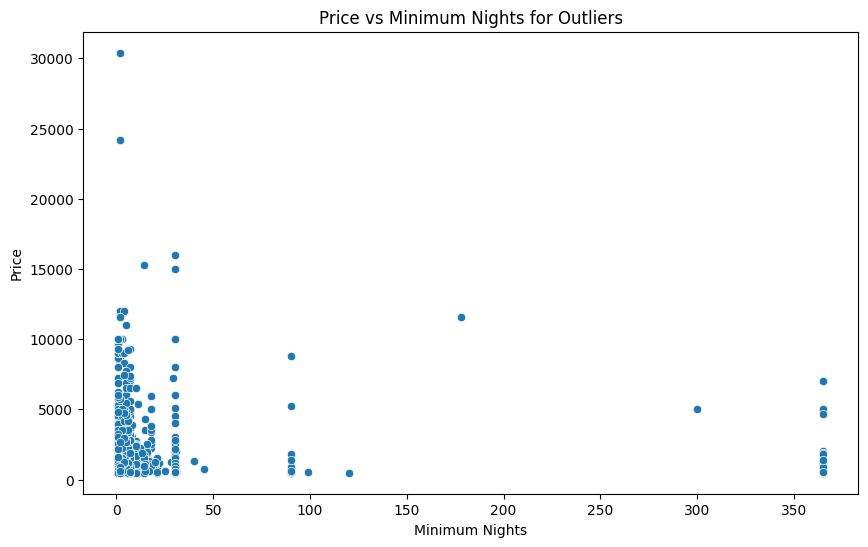

In [37]:
Q1 = listings_df["price_float"].quantile(0.25)
Q3 = listings_df["price_float"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = (listings_df["price_float"] < lower_bound) | (listings_df["price_float"] > upper_bound)
outliers_df = listings_df[outliers_mask]

# se realiza la gráfica para ver los outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price_float', data=outliers_df, palette='pastel')
plt.title('Price vs Minimum Nights for Outliers')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()


Después de haber realizado el análisis numérico se obtuvieron los siguientes **insights** para cada una de las variables:
1. *Price float:* Las propiedades de Airbnb en Paris, un precio medio de aproximadamente 256 euros, aunque con una gran variabilidad, evidenciada por una desviación estándar de 522 euros. La presencia de 32.72% de valores nulos en la columna de precios indica que un número significativo de registros no tienen precio/noche, lo cual puede afectar la precisión en el análisis para los inversionistas. Además, el análisis de los valores atípicos muestra que un 6.04% de los precios se consideran extremos, lo que sugiere que hay apartamentos con precios significativamente más altos. La distribución también presenta una fuerte asimetría positiva (skewness de 17.25) y alta curtosis (kurtosis de 507.77), lo que indica que la mayoría de los apartamentos tienen precios relativamente bajos, mientras que unos pocos tienen precios extremadamente altos.
- Dado que se quiere recomendar a los inversores en qué propiedades invertir, imputar no es una opción, ya que la imputación de valores nulos puede influir en los resultados, especialmente a la hora de identificar apartamentos rentables para los inversionistas. Se utilizarán únicamente, aquellos que tienen precio.
- Se eliminarán los outliers. Inicialmente, con el análisis visual el precio/día no está relacionado con corta estadía en estos alojamientos ya que la mayoría de estos Airbnb permiten tener estadías menores a los 50 días. No obstante, se eliminarán los outliers.

2. *Availability_365:* Las propiedades en Paris presentan una disponibilidad promedio de 127 días. La desviación estándar es de 130.79 días, lo que indica una variabilidad considerable en la disponibilidad de los apartamentos. El valor mínimo es 0, lo que sugiere que algunos apartamentos no están disponibles en absoluto durante el año, mientras que el máximo es de 365 días, lo que indica que hay propiedades disponibles todo el año. La mediana, ubicada en 84 días, señala que la mayoría de los apartamentos tienen una disponibilidad relativamente baja. Además, no se presentan valores nulos en esta columna, lo que garantiza que todos los registros cuentan con información sobre la disponibilidad. En cuanto a los outliers, no se han identificado valores atípicos, lo que indica que la mayoría de los datos se ajustan a un rango razonable. La asimetría (skewness de 0.52) sugiere una ligera inclinación positiva en la distribución, lo que indica que hay un número considerable de apartamentos con disponibilidad limitada. La kurtosis negativa (-1.26) sugiere que la distribución es más plana que la normal, lo que implica que hay menos frecuencias extremas en comparación con una distribución normal.

- No se realizarán cambios para esta columna.

3. *Accommodates:* El promedio es de aproximadamente 3 personas, lo que sugiere que la mayoría de los apartamentos están diseñados para grupos pequeños. La desviación estándar es de 1.66, por lo que se presenta cierta variabilidad en la capacidad de alojamiento. Los valores en esta columna oscilan entre un mínimo de 1 y un máximo de 16 huéspedes. La mediana es de 3, lo que refuerza la idea de que muchos apartamentos están orientados a grupos reducidos, ya que el 50% de los registros tienen una capacidad de 3 o menos personas. No hay valores nulos en esta columna, lo que garantiza que todos los registros tienen información sobre la capacidad de alojamiento. La asimetría (skewness de 1.59) indica una inclinación positiva en la distribución, lo que sugiere que hay una mayor concentración de apartamentos con capacidades más bajas y algunos pocos con capacidades significativamente más altas. Sí se presentan outliers.

- Se eliminarán variables outliers.

In [38]:
final_df_modified = final_df.copy()

# Se eliminan los valores null
final_df_mod = final_df_modified.dropna(subset=["price_float"]).reset_index(drop=True)


# Se eliminan los outliers
Q1 = final_df_mod["price_float"].quantile(0.25)
Q3 = final_df_mod["price_float"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

final_df_mod = final_df_mod[(final_df_mod["price_float"] >= lower_bound) & (final_df_mod["price_float"] <= upper_bound)].reset_index(drop=True)

print(f"Original shape: {final_df.shape}")
print(f"Modified shape: {final_df_mod.shape}")
print(f"Number of rows removed: {final_df.shape[0] - final_df_mod.shape[0]}")
print(f"Percentage of rows removed: {round((final_df.shape[0] - final_df_mod.shape[0]) / final_df.shape[0] * 100, 2)}%")

Original shape: (95461, 5)
Modified shape: (58460, 5)
Number of rows removed: 37001
Percentage of rows removed: 38.76%


##### **4.1.2-Categorical-variables**

Se realiza en primer lugar para las **variables categóricas**:

In [39]:
print("ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES CATEGÓRICAS")
for catcol in final_categorical_columns:
    print("\n","*"*50)
    print(f"Column: {catcol}\n")
    print(final_df_mod[catcol].describe())

ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES CATEGÓRICAS

 **************************************************
Column: room_type

count               58460
unique                  4
top       Entire home/apt
freq                52512
Name: room_type, dtype: object

 **************************************************
Column: neighbourhood_cleansed

count                 58460
unique                   20
top       Buttes-Montmartre
freq                   6185
Name: neighbourhood_cleansed, dtype: object


In [40]:
for catcol in final_categorical_columns:
    print("\n","*"*50)
    print(f"Column: {catcol}\n")
    null_percentage = (final_df_mod[catcol].isnull().sum() / len(final_df_mod)) * 100
    print(f"Percentage of null values in '{catcol}': {null_percentage:.2f}%")


 **************************************************
Column: room_type

Percentage of null values in 'room_type': 0.00%

 **************************************************
Column: neighbourhood_cleansed

Percentage of null values in 'neighbourhood_cleansed': 0.00%


In [41]:
for catcol in final_categorical_columns:
    print("\n", "*"*50)
    print(f"Column: {catcol}\n")
    print(final_df_mod[catcol].value_counts(normalize=True))


 **************************************************
Column: room_type

room_type
Entire home/apt    0.898255
Private room       0.090027
Hotel room         0.007920
Shared room        0.003797
Name: proportion, dtype: float64

 **************************************************
Column: neighbourhood_cleansed

neighbourhood_cleansed
Buttes-Montmartre      0.105799
Popincourt             0.085973
Vaugirard              0.081081
Batignolles-Monceau    0.069158
Entrepôt               0.065806
Passy                  0.064950
Buttes-Chaumont        0.053712
Ménilmontant           0.050804
Opéra                  0.050034
Temple                 0.044920
Reuilly                0.041293
Observatoire           0.038231
Bourse                 0.038146
Gobelins               0.034365
Panthéon               0.032125
Élysée                 0.031953
Hôtel-de-Ville         0.031834
Luxembourg             0.028909
Palais-Bourbon         0.027557
Louvre                 0.023349
Name: proportion, dtype: 

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1030938815.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="room_type", y="percentage", data=percentage_df_rt, palette="viridis")


Text(0, 0.5, 'Percentage')

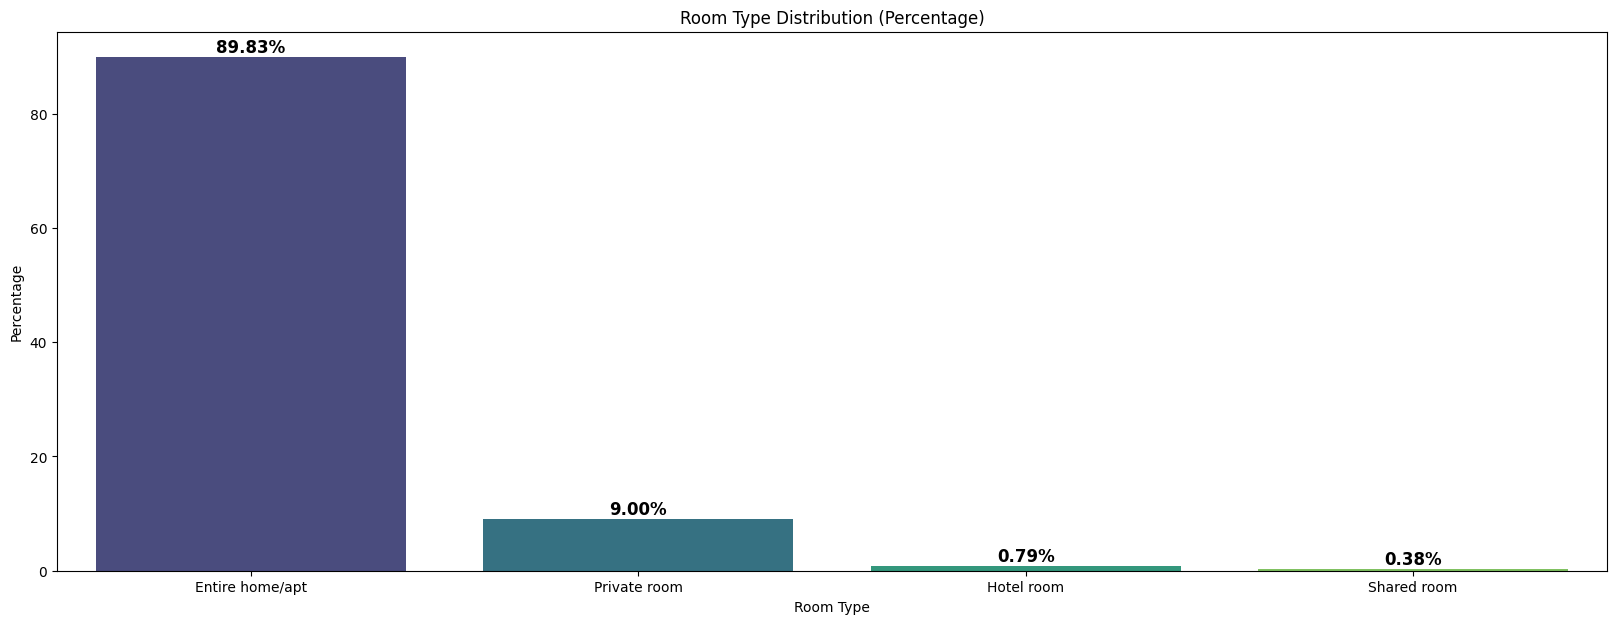

In [42]:
# se calculan los porcentajes de cada categoria
category_counts_rt = final_df_mod["room_type"].value_counts()
category_percentages_rt = (category_counts_rt / category_counts_rt.sum()) * 100

percentage_df_rt = category_percentages_rt.reset_index()
percentage_df_rt.columns = ["room_type", "percentage"]

plt.figure(figsize=(20, 7))
sns.barplot(x="room_type", y="percentage", data=percentage_df_rt, palette="viridis")
for index, row in percentage_df_rt.iterrows():
    plt.text(index, row["percentage"] + 0.8, f'{row["percentage"]:.2f}%', color='black', ha="center", fontsize=12, fontweight='bold')

plt.title("Room Type Distribution (Percentage)")
plt.xlabel("Room Type")
plt.ylabel("Percentage")

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1373729128.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="percentage", y="neighbourhood_cleansed", data=percentage_df_n, palette="dark")


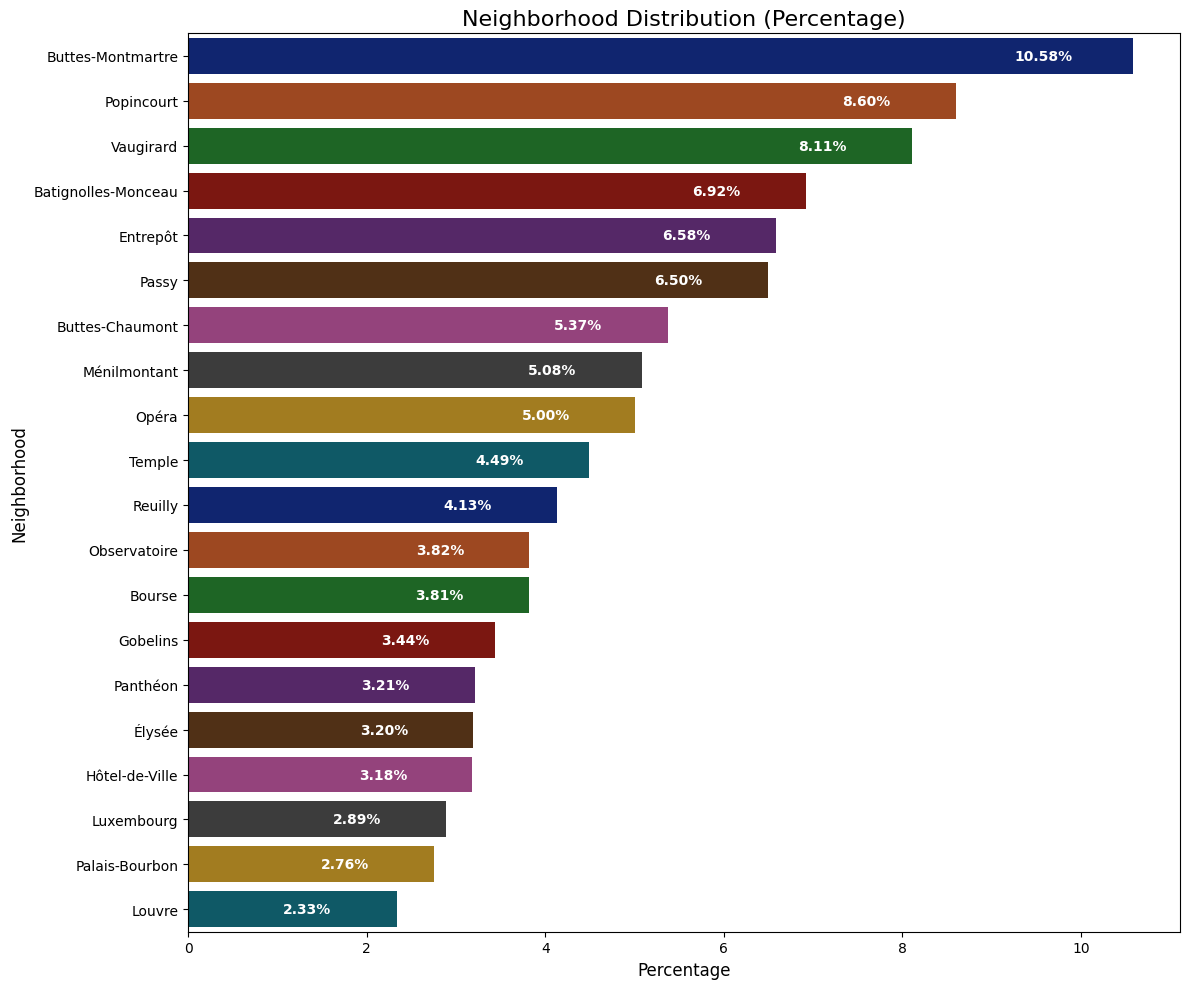

In [43]:
category_counts_n = final_df_mod["neighbourhood_cleansed"].value_counts()
category_percentages_n = (category_counts_n / category_counts_n.sum()) * 100

percentage_df_n = category_percentages_n.reset_index()
percentage_df_n.columns = ["neighbourhood_cleansed", "percentage"]
percentage_df = percentage_df_n.sort_values("percentage", ascending=False)

# Crear gráfica de barras para la distribución de los neighborhoods
plt.figure(figsize=(12, 10))
sns.barplot(x="percentage", y="neighbourhood_cleansed", data=percentage_df_n, palette="dark")

for index, row in percentage_df_n.iterrows():
    plt.text(row["percentage"] - 1, index, f'{row["percentage"]:.2f}%', 
             color='white', va="center", ha="center", fontsize=10, fontweight='bold')

plt.title("Neighborhood Distribution (Percentage)", fontsize=16)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)
plt.tight_layout()
plt.show()

1. *Room_type:*  Esta variable se compone de cuatro categorías únicas: "Entire home/apt", "Private room", "Hotel room" y "Shared room". La categoría más frecuente es "Entire home/apt", que representa aproximadamente el 90% de los registros, seguida de "Private room" con alrededor del 9%. Las categorías "Hotel room" y "Shared room" son significativamente menos comunes, representando menos del 1% cada una. 
2. *Neighborhoods:* La variable de los varrios cuenta con 20 barrios únicos, siendo "Buttes-Montmartre" el más común, con 6,185 registros, lo que representa aproximadamente el 10.58% del total. Otros barrios destacados son "Popincourt" (8.60%), "Vaugirard" (8.11%) y "Batignolles-Monceau" (6.92%), que también tienen una proporción significativa de registros. Esta variabilidad sugiere que las preferencias de los usuarios pueden estar influenciadas por la ubicación en la ciudad, y sería interesante explorar si hay diferencias en precios o tipos de alojamientos en función de los barrios.

Con el fin de reducir un poco la dimensionalidad de estas variables se propone:
- Juntar "Hotel room" y "shared room" en una categoría llamada "Other"
- Juntar los arrondisement 1,2,3,4 en una categoría llamada: "Paris centre" dado que estos distritos son mejormente conocidos como el centro de Paris y funcionan conjuntamente.

In [44]:
final_df_mod["room_type_m"] = final_df_mod["room_type"].replace(
    {"Hotel room": "Other", "Shared room": "Other"}
)
paris_centre = ["Louvre", "Bourse", "Temple", "Hôtel-de-Ville"]

final_df_mod["neighbourhood"] = final_df_mod["neighbourhood_cleansed"].replace(paris_centre, "Paris-centre")


Asimismo, es importante calcular la tasa de ocupación de cada uno de las propiedades y los ingresos ganados hasta el momento de acuerdo con la tasa de ocupación (availability-365). Estas son dos columnas derivadas que pueden dar mejores indicios sobre en qué propiedades invertir bajo el supuesto que los inversionistas quieren **maximizar** sus ingresos.

In [45]:
final_df_mod["occupancy_rate"] = (365 - final_df_mod["availability_365"]) / 365
final_df_mod ["occupancy_days"] = 365 - final_df_mod["availability_365"]
final_df_mod["income_generated"] = final_df_mod["occupancy_rate"] * final_df_mod["price_float"] * 365


#### **4.2-Data-visualizations**

##### **4.2.1-Room-bivariate**

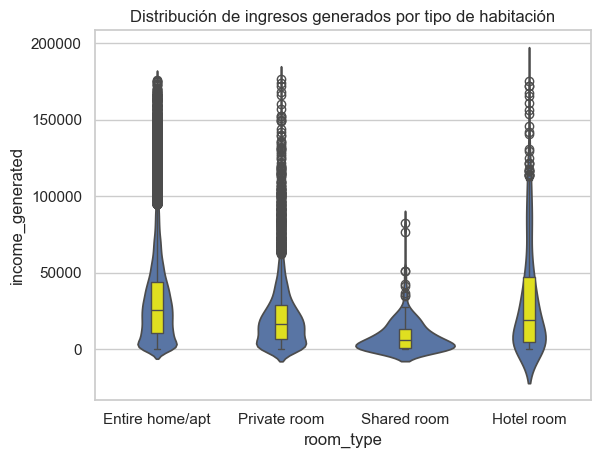

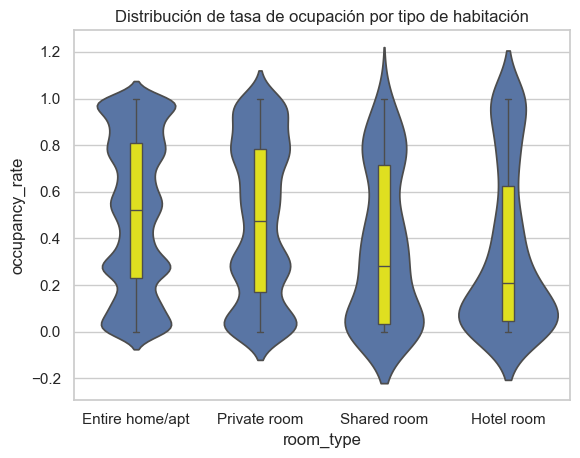

In [74]:
###############################################################
# ROOM TYPE
###############################################################

# precios por tipo de habitación
sns.violinplot(x="room_type", y="price_float", data=final_df_mod, inner=None)
sns.boxplot(x="room_type", y="price_float", data=final_df_mod, color='yellow', width=0.1)
plt.title("Distribución de precios por tipo de habitación")
plt.show()

# ingresos generados por tipo de habitación
sns.violinplot(x="room_type", y="income_generated", data=final_df_mod, inner=None)
sns.boxplot(x="room_type", y="income_generated", data=final_df_mod, color='yellow', width=0.1)
plt.title("Distribución de ingresos generados por tipo de habitación")
plt.show()


# tasa de ocupación generados por tipo de habitación
sns.violinplot(x="room_type", y="occupancy_rate", data=final_df_mod, inner=None)
sns.boxplot(x="room_type", y="occupancy_rate", data=final_df_mod, color='yellow', width=0.1)
plt.title("Distribución de tasa de ocupación por tipo de habitación")
plt.show()

In [75]:
# Se crea un gráfico de densidad para visualizar la distribución de precios por tipo de habitación
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_df_mod, x='price_float', hue='room_type', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución de precios por tipo de habitación')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.show()

# Se crea un gráfico de densidad para visualizar la distribución de ingresos generados por tipo de habitación
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_df_mod, x='income_generated', hue='room_type', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución de ingresos generados por tipo de habitación')
plt.xlabel('Ingresos generados')
plt.ylabel('Densidad')
plt.show()

# Se crea un gráfico de densidad para visualizar la distribución de tasa de ocupación por tipo de habitación
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_df_mod, x='occupancy_rate', hue='room_type', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribución de tasa de ocupación por tipo de habitación')
plt.xlabel('Tasa de ocupación')
plt.ylabel('Densidad')
plt.show()


In [76]:
################################################
# ROOM TYPE
################################################

# Group by 'room_type'
stats_df_price_rt = final_df_mod.groupby('room_type')['price_float'].agg([
    ('25%', lambda x: round(x.quantile(0.25), 0)),
    ('75%', lambda x: round(x.quantile(0.75), 0)),
    ('IQR', lambda x: round(x.quantile(0.75) - x.quantile(0.25), 0)),
    ('median', lambda x: round(x.median(), 0)),
    ('mean', lambda x: round(x.mean(), 0)),
    ('std', lambda x: round(x.std(), 0))
])

# Group by income generated

stats_df_income_rt = final_df_mod.groupby('room_type')['income_generated'].agg([
    ('25%', lambda x: round(x.quantile(0.25), 0)),
    ('75%', lambda x: round(x.quantile(0.75), 0)),
    ('IQR', lambda x: round(x.quantile(0.75) - x.quantile(0.25), 0)),
    ('median', lambda x: round(x.median(), 0)),
    ('mean', lambda x: round(x.mean(), 0)),
    ('std', lambda x: round(x.std(), 0))
])

# Group by occupancy rate

stats_df_occupancy_rt = final_df_mod.groupby('room_type')['occupancy_rate'].agg([
    ('25%', lambda x: round(x.quantile(0.25), 2)),
    ('75%', lambda x: round(x.quantile(0.75), 2)),
    ('IQR', lambda x: round(x.quantile(0.75) - x.quantile(0.25), 2)),
    ('median', lambda x: round(x.median(), 2)),
    ('mean', lambda x: round(x.mean(), 2)),
    ('std', lambda x: round(x.std(), 2))
])

In [77]:

stats_df_price_rt = stats_df_price_rt[['25%', '75%', 'IQR', 'median', 'mean', 'std']]
stats_df_price_rt = stats_df_price_rt.sort_values(by='mean', ascending=False)
stats_df_price_rt


25%    75%    IQR  median   mean   std
room_type                                                
Hotel room       192.0  318.0  126.0   252.0  261.0  91.0
Entire home/apt  102.0  223.0  121.0   150.0  175.0  95.0
Private room      70.0  175.0  105.0   101.0  137.0  93.0
Shared room       40.0   80.0   40.0    50.0   70.0  54.0

En general, en términos del precio, las habitaciones de hotel y entire home/apt es más alto ya que tienen el precio más alto (mediana de 252) y de (mediana de 150). En ambos casos se presenta una desviación estándar de 91 a 95 euros. A primera vista, estos dos parecen ser una buena opción para invertir.

In [78]:

stats_df_income_rt = stats_df_income_rt[['25%', '75%', 'IQR', 'median', 'mean', 'std']]
stats_df_income_rt = stats_df_income_rt.sort_values(by='mean', ascending=False)
stats_df_income_rt

25%      75%      IQR   median     mean      std
room_type                                                            
Hotel room        4328.0  46843.0  42515.0  18950.0  32891.0  38143.0
Entire home/apt  10416.0  44100.0  33684.0  25658.0  31590.0  27739.0
Private room      6344.0  28800.0  22455.0  16416.0  21674.0  22328.0
Shared room        559.0  12895.0  12336.0   6142.0   8886.0  11699.0

A diferencia de considerar únicamente el precio, el ingreso combina las dos variables de available_365 y el precio para ver cuales son los ingresos esperados. En este caso, se logra observar nuevamente que las dos tipos de viviendas que Hotel room y Entire home/apt son las mejores opciones. Entire home/apt tiene la mediana más alta (25,658), lo que indica que la mitad de las propiedades de este tipo generan al menos este monto. La media (31,590) también es alta, lo que sugiere que algunas propiedades generan ingresos muy superiores a la mediana. Por otro lado, Hotel room tiene una mediana menor (18,950) pero una media considerablemente mayor (32,891), lo que indica que algunas habitaciones de hotel generan ingresos muy elevados, lo que arrastra la media hacia arriba.

In [79]:

stats_df_occupancy_rt = stats_df_occupancy_rt[['25%', '75%', 'IQR', 'median', 'mean', 'std']]
stats_df_occupancy_rt = stats_df_occupancy_rt.sort_values(by='mean', ascending=False)
stats_df_occupancy_rt

25%   75%   IQR  median  mean   std
room_type                                            
Entire home/apt  0.23  0.81  0.58    0.52  0.51  0.33
Private room     0.17  0.78  0.61    0.48  0.48  0.33
Shared room      0.03  0.71  0.68    0.28  0.36  0.32
Hotel room       0.05  0.63  0.58    0.21  0.35  0.35

Finalmente, dado que la tasa de ocupación se encuentra directamente relacionada con los ingresos, también se observa que la mejor opción es Entire home/apt. La diferencia recide en private room que adquiere la segunda posición con respecto a tasa de ocupación.

##### **4.2.2-Neighborhood-bivariate**

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1124993826.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_float', y='neighbourhood', data=average_price, ax=ax, palette='dark')


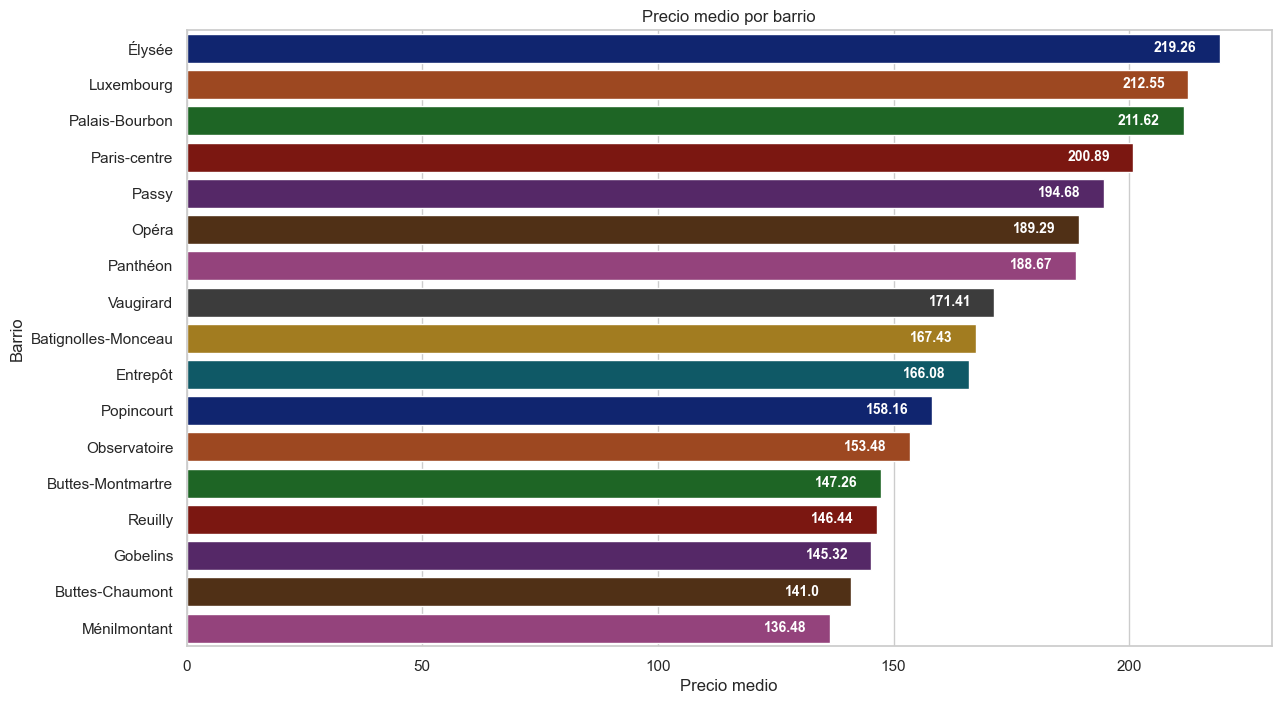

C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1124993826.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_generated', y='neighbourhood', data=average_income, ax=ax, palette='dark')


C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1124993826.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='occupancy_rate', y='neighbourhood', data=average_occupancy, ax=ax, palette='dark')


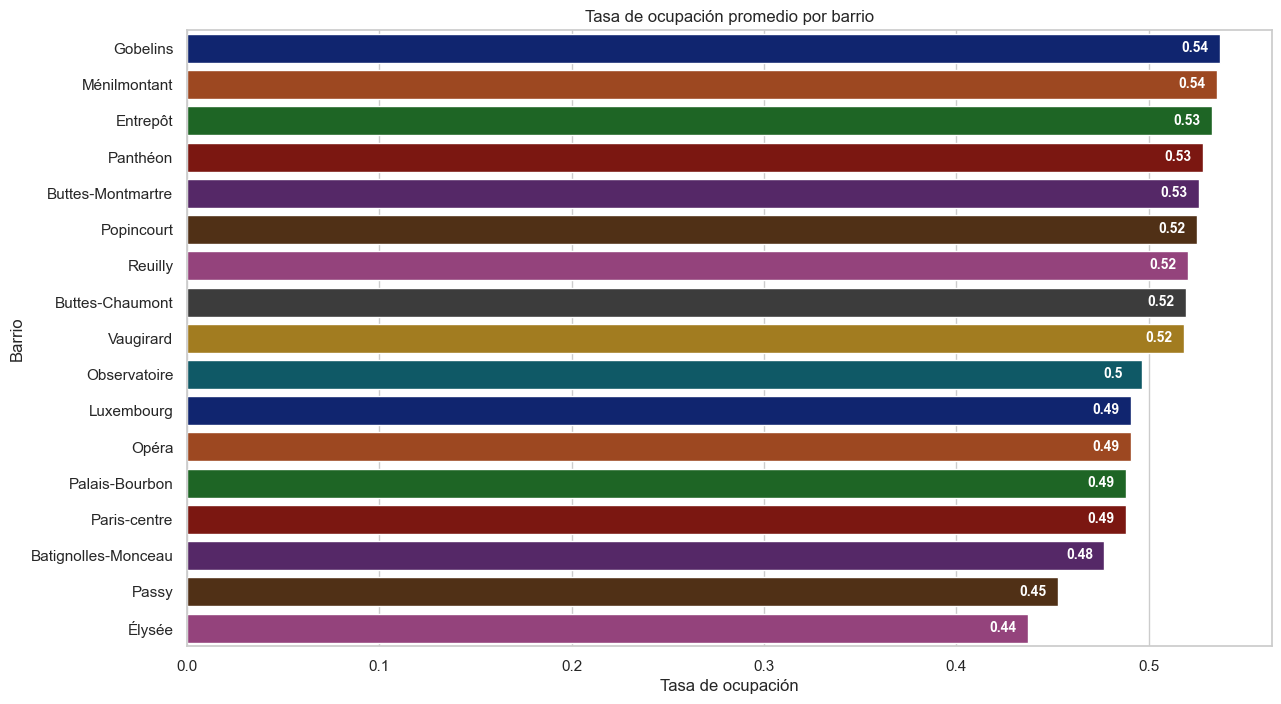

In [80]:
#################################################
# NEIGHBOURHOOD
#################################################

# Calculamos los promedios
average_price = final_df_mod.groupby('neighbourhood')['price_float'].mean().reset_index()
average_income = final_df_mod.groupby('neighbourhood')['income_generated'].mean().reset_index()
average_occupancy = final_df_mod.groupby('neighbourhood')['occupancy_rate'].mean().reset_index()

average_price = average_price.sort_values(by='price_float', ascending=False)
average_income = average_income.sort_values(by='income_generated', ascending=False)
average_occupancy = average_occupancy.sort_values(by='occupancy_rate', ascending=False)

# gráfica de barras para el precio promedio por barrio
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='price_float', y='neighbourhood', data=average_price, ax=ax, palette='dark')
ax.set_title('Precio medio por barrio')
ax.set_xlabel('Precio medio')
ax.set_ylabel('Barrio')
for i in ax.patches:
    ax.text(i.get_width() -14, i.get_y() + 0.5,
            str(round(i.get_width(), 2)),
            fontsize=10, color='white', fontweight='bold')
plt.show()

# gráfica de barras para el ingreso promedio por barrio
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='income_generated', y='neighbourhood', data=average_income, ax=ax, palette='dark')
ax.set_title('Ingreso medio por barrio')
ax.set_xlabel('Ingreso medio')
ax.set_ylabel('Barrio')
for i in ax.patches:
    ax.text(i.get_width()-3000, i.get_y() + 0.5,
            str(round(i.get_width(), 0)),
            fontsize=10, color='white', fontweight='bold')
plt.show()

# gráfica de barras para la tasa de ocupación promedio por barrio

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='occupancy_rate', y='neighbourhood', data=average_occupancy, ax=ax, palette='dark')
ax.set_title('Tasa de ocupación promedio por barrio')
ax.set_xlabel('Tasa de ocupación')
ax.set_ylabel('Barrio')
for i in ax.patches:
    ax.text(i.get_width()-0.02, i.get_y() + 0.5,
            str(round(i.get_width(), 2)),
            fontsize=10, color='white', fontweight='bold')
plt.show()



In [81]:
################################################
# NEIGHBOURHOOD
################################################

# Group by 'neighbourhood'
stats_df_price = final_df_mod.groupby('neighbourhood')['price_float'].agg([
    ('25%', lambda x: round(x.quantile(0.25), 0)),
    ('75%', lambda x: round(x.quantile(0.75), 0)),
    ('IQR', lambda x: round(x.quantile(0.75) - x.quantile(0.25), 0)),
    ('median', lambda x: round(x.median(), 0)),
    ('mean', lambda x: round(x.mean(), 0)),
    ('std', lambda x: round(x.std(), 0))
])

# Group by income generated
stats_df_income = final_df_mod.groupby('neighbourhood')['income_generated'].agg([
    ('25%', lambda x: round(x.quantile(0.25), 0)),
    ('75%', lambda x: round(x.quantile(0.75), 0)),
    ('IQR', lambda x: round(x.quantile(0.75) - x.quantile(0.25), 0)),
    ('median', lambda x: round(x.median(), 0)),
    ('mean', lambda x: round(x.mean(), 0)),
    ('std', lambda x: round(x.std(), 0))
])

# Group by occupancy rate
stats_df_occupancy = final_df_mod.groupby('neighbourhood')['occupancy_rate'].agg([
    ('25%', lambda x: round(x.quantile(0.25), 2)),
    ('75%', lambda x: round(x.quantile(0.75), 2)),
    ('IQR', lambda x: round(x.quantile(0.75) - x.quantile(0.25), 2)),
    ('median', lambda x: round(x.median(), 2)),
    ('mean', lambda x: round(x.mean(), 2)),
    ('std', lambda x: round(x.std(), 2))
])

In [82]:
stats_df_price = stats_df_price[['25%', '75%', 'IQR', 'median', 'mean', 'std']]
stats_df_price = stats_df_price.sort_values(by='mean', ascending=False)
stats_df_price

25%    75%    IQR  median   mean    std
neighbourhood                                                 
Élysée               135.0  294.0  159.0   200.0  219.0  106.0
Luxembourg           130.0  283.0  153.0   194.0  213.0  104.0
Palais-Bourbon       130.0  280.0  150.0   190.0  212.0  106.0
Paris-centre         126.0  257.0  131.0   180.0  201.0   98.0
Passy                111.0  260.0  149.0   167.0  195.0  106.0
Panthéon             115.0  243.0  128.0   166.0  189.0   98.0
Opéra                120.0  242.0  122.0   170.0  189.0   94.0
Vaugirard            100.0  215.0  115.0   147.0  171.0   96.0
Batignolles-Monceau   99.0  214.0  115.0   140.0  167.0   94.0
Entrepôt             100.0  203.0  103.0   140.0  166.0   92.0
Popincourt            97.0  200.0  103.0   132.0  158.0   85.0
Observatoire          90.0  191.0  101.0   127.0  153.0   90.0
Buttes-Montmartre     90.0  180.0   90.0   121.0  147.0   82.0
Reuilly               90.0  180.0   90.0   121.0  146.0   82.0
Gobelins              85.0  180.0   95.0   120.0  145.0   87.0
Buttes-Chaumont       85.0  172.0   87.0   115.0  141.0   84.0
Ménilmontant          82.0  162.0   80.0   110.0  136.0   82.0

En general, se observa que los barrios más caros son Élysée, Luxembourg, Palais-Bourbon son los barrios con precios más altos en general, con una mediana de entre 190 y 200 euros y una media por encima de los 210 euros. No obstante, también presentan la desviación más alta de todos en general (alrededor de 106). En segundo lugar, Paris-centre, Panthéon y Opéra presentan medianas más bajas y una menor desviación estándar. Además, estos barrios intermedios también se encuentran ubicados cerca de varias zonas turísticas, incluido el río Sena por lo que podrían ser una buena inversión.

In [83]:
stats_df_income = stats_df_income[['25%', '75%', 'IQR', 'median', 'mean', 'std']]
stats_df_income = stats_df_income.sort_values(by='mean', ascending=False)
stats_df_income

25%      75%      IQR   median     mean      std
neighbourhood                                                            
Luxembourg           11540.0  55740.0  44200.0  29996.0  37483.0  32623.0
Palais-Bourbon       12061.0  51070.0  39008.0  29500.0  36960.0  32671.0
Panthéon             11867.0  50044.0  38177.0  29008.0  35531.0  30481.0
Paris-centre         10458.0  50266.0  39808.0  28249.0  34895.0  30371.0
Élysée                9707.0  46407.0  36700.0  25235.0  33174.0  30572.0
Opéra                 9984.0  46800.0  36816.0  26904.0  32492.0  28060.0
Passy                 7525.0  46292.0  38767.0  23040.0  31994.0  31647.0
Vaugirard             9972.0  43200.0  33228.0  25920.0  31622.0  28125.0
Entrepôt             10685.0  43200.0  32515.0  25560.0  31386.0  27325.0
Popincourt           10269.0  41614.0  31345.0  24265.0  29461.0  25491.0
Batignolles-Monceau   8612.0  39490.0  30878.0  22420.0  28083.0  25870.0
Buttes-Montmartre     9600.0  38340.0  28740.0  23000.0  27531.0  24026.0
Gobelins              9875.0  37800.0  27925.0  22806.0  27179.0  23476.0
Reuilly               9865.0  37412.0  27547.0  22800.0  27020.0  22994.0
Observatoire          8576.0  37245.0  28668.0  21420.0  26742.0  24526.0
Ménilmontant          9600.0  35516.0  25916.0  22101.0  25875.0  22607.0
Buttes-Chaumont       8896.0  35900.0  27004.0  21300.0  25812.0  22904.0

Nuevamente, se observa que Luxembourg y Palais-Bourbon son los barrios con los ingresos más altos, con una mediana de alrededor de 30,000 euros y una media cercana a 37,000 euros. Por otro lado, Panthéon y Paris-centre presentan ingresos robustos, con medianas alrededor de 28,000-29,000 euros. Son buenos candidatos para inversión, ya que están ubicados en áreas centrales y populares.

In [84]:
stats_df_occupancy = stats_df_occupancy[['25%', '75%', 'IQR', 'median', 'mean', 'std']]
stats_df_occupancy = stats_df_occupancy.sort_values(by='mean', ascending=False)
stats_df_occupancy

25%   75%   IQR  median  mean   std
neighbourhood                                            
Gobelins             0.26  0.83  0.57    0.57  0.54  0.33
Ménilmontant         0.26  0.83  0.56    0.56  0.54  0.33
Panthéon             0.22  0.83  0.61    0.55  0.53  0.33
Entrepôt             0.26  0.84  0.58    0.56  0.53  0.33
Buttes-Montmartre    0.26  0.83  0.57    0.55  0.53  0.33
Popincourt           0.26  0.84  0.58    0.55  0.52  0.33
Buttes-Chaumont      0.26  0.82  0.56    0.53  0.52  0.33
Vaugirard            0.24  0.82  0.58    0.54  0.52  0.33
Reuilly              0.26  0.81  0.55    0.54  0.52  0.32
Observatoire         0.22  0.80  0.58    0.51  0.50  0.33
Palais-Bourbon       0.21  0.78  0.57    0.47  0.49  0.32
Opéra                0.18  0.80  0.62    0.50  0.49  0.34
Luxembourg           0.20  0.80  0.60    0.48  0.49  0.33
Paris-centre         0.17  0.79  0.63    0.49  0.49  0.33
Batignolles-Monceau  0.22  0.77  0.56    0.46  0.48  0.33
Passy                0.14  0.76  0.62    0.42  0.45  0.33
Élysée               0.14  0.73  0.59    0.37  0.44  0.32

Finalmente, en términos de tasa de ocupación, Gobelins y Ménilmontant tienen las tasas de ocupación más altas, con una mediana de 0.57 y una media de 0.54. Esto sugiere que estos barrios tienen un buen nivel de demanda. Además, Panthéon y Entrepôt también muestran tasas de ocupación sólidas, con medianas de 0.55 y 0.56 respectivamente, indicando que estos son lugares con buena actividad de inquilinos. En las tres listas, el barrio que se presenta es Panthéon por lo que puede ser una buena opción.


##### **4.2.3-Accommodates-bivariate**

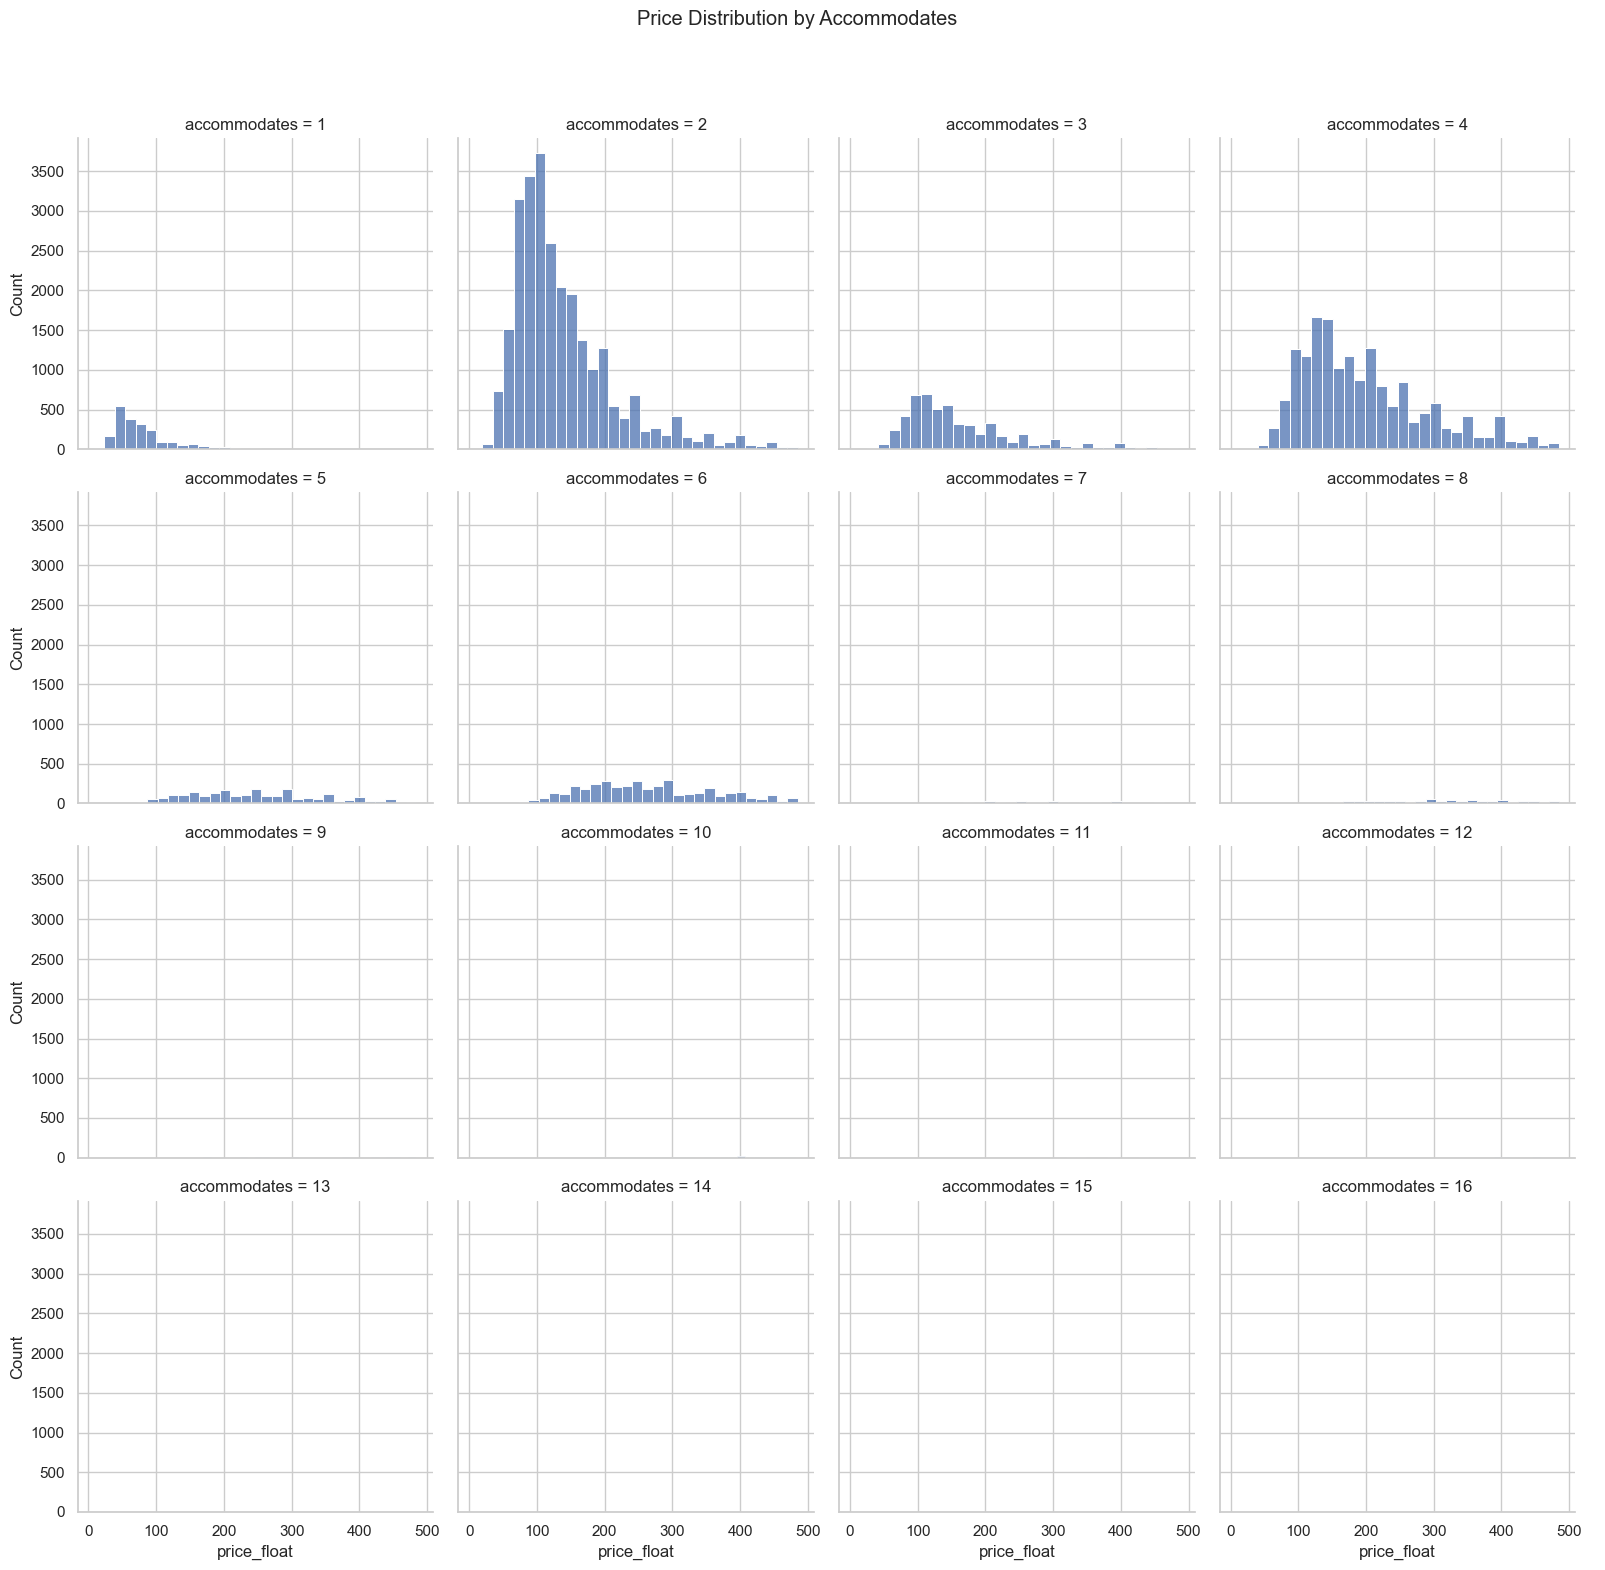

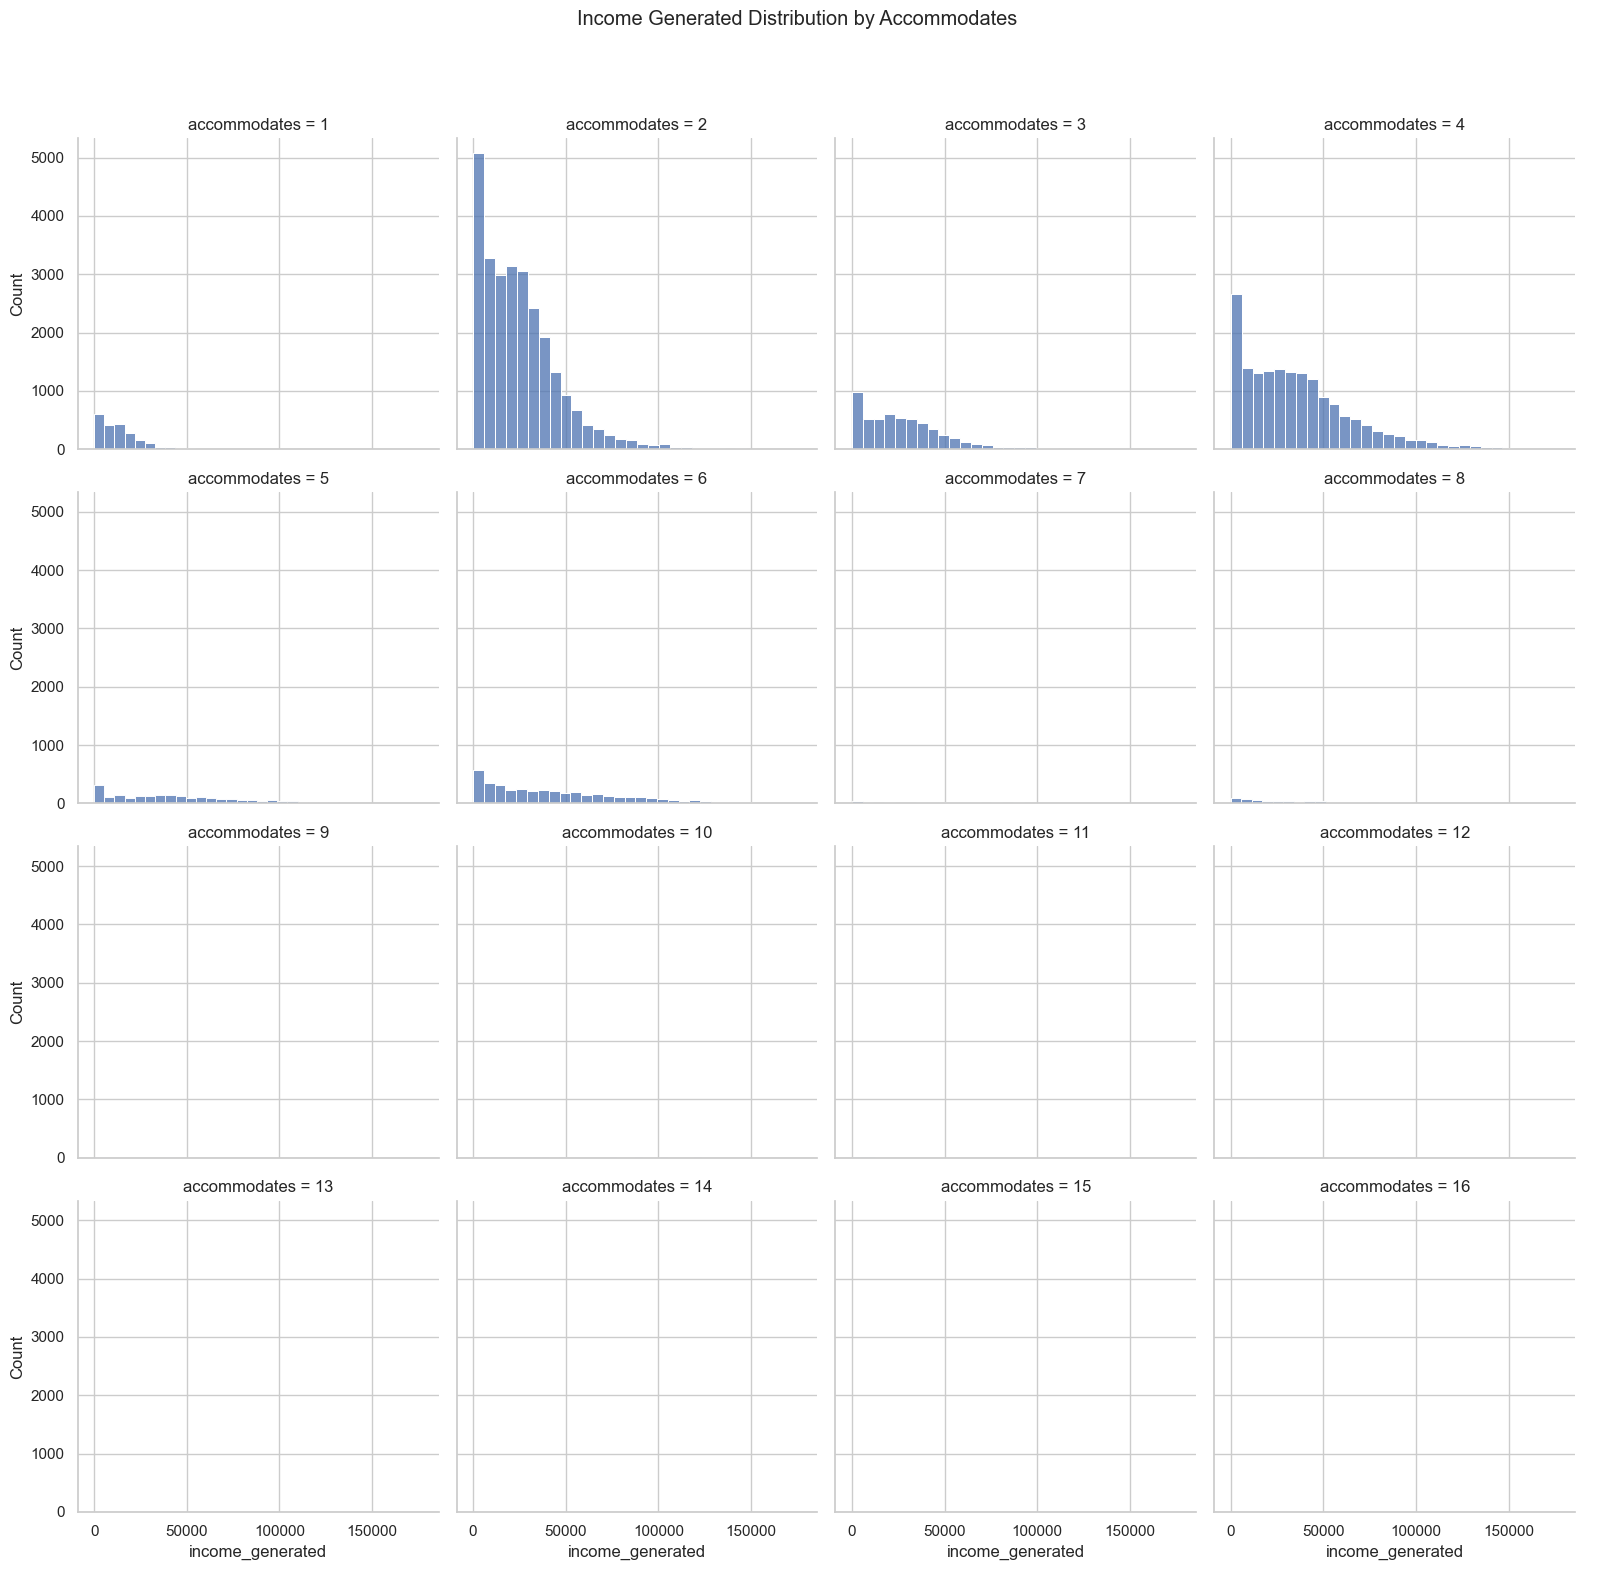

In [93]:
g = sns.FacetGrid(final_df_mod, col='accommodates', col_wrap=4, height=4)
g.map(sns.histplot, 'price_float', bins=30)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price Distribution by Accommodates')
plt.show()

g = sns.FacetGrid(final_df_mod, col='accommodates', col_wrap=4, height=4)
g.map(sns.histplot, 'income_generated', bins=30)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Income Generated Distribution by Accommodates')
plt.show()

g = sns.FacetGrid(final_df_mod, col='accommodates', col_wrap=4, height=4)
g.map(sns.histplot, 'occupancy_rate', bins=30)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Occupancy Rate Distribution by Accommodates')
plt.show()


C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1915302540.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=final_df_mod, x='accommodates', y='price_float', estimator='mean', ci='sd')


C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1915302540.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=final_df_mod, x='accommodates', y='income_generated', estimator='mean', ci='sd')


C:\Users\GomezLina(BipGroup)\AppData\Local\Temp\ipykernel_25864\1915302540.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=final_df_mod, x='accommodates', y='occupancy_rate', estimator='mean', ci='sd')


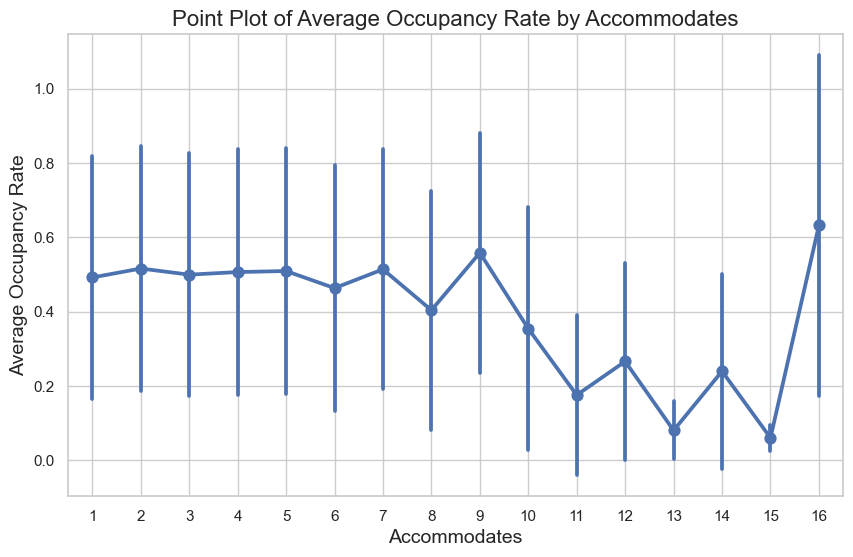

In [94]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=final_df_mod, x='accommodates', y='price_float', estimator='mean', ci='sd')
plt.title('Point Plot of Average Price by Accommodates', fontsize=16)
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.pointplot(data=final_df_mod, x='accommodates', y='income_generated', estimator='mean', ci='sd')
plt.title('Point Plot of Average Income Generated by Accommodates', fontsize=16)
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Average Income Generated', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.pointplot(data=final_df_mod, x='accommodates', y='occupancy_rate', estimator='mean', ci='sd')
plt.title('Point Plot of Average Occupancy Rate by Accommodates', fontsize=16)
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Average Occupancy Rate', fontsize=14)
plt.grid(True)
plt.show()


En términos de precio, parece que a mayor número de personas mayor es el precio. No obstante, la varianza es muy alta. 15 personas es quien obtiene un mayor precio y presenta una baja varianza. En términos de ingresos, aquellos Airbnb que reciben entre 7 y 9 personas son los que obtienen mayores ingresos. Finalmente, estos también son los que tienen mayor tasa de ocupación 7,9 y 16. 

Finalmente, se calcula la matriz de correlación entre variables.

In [100]:
final_df_mod.columns

Index(['room_type', 'price_float', 'availability_365',
       'neighbourhood_cleansed', 'accommodates', 'room_type_m',
       'neighbourhood', 'occupancy_rate', 'occupancy_days',
       'income_generated'],
      dtype='object')

In [103]:
selected_columns = ['price_float', 'availability_365', 'accommodates']
numeric_df = final_df_mod[selected_columns]

correlation = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Finalmente, se realiza un análisis con todas las variables importantes con tal de ver cuáles efectivamente maximizan los ingresos.

In [150]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df_mod, x='neighbourhood', y='income_generated', hue='room_type')
plt.xticks(rotation=45)
plt.title('Income Distribution by Neighborhood and Room Type')
plt.ylabel('Income Generated')
plt.xlabel('Neighborhood')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


In [153]:
income_contingency = final_df_mod.pivot_table(values='income_generated', 
                                                index='neighbourhood', 
                                                columns='room_type', 
                                                aggfunc='median')
plt.figure(figsize=(12, 8))
sns.heatmap(income_contingency, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Median Income Generated by Neighborhood and Room Type')
plt.ylabel('Neighborhood')
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()





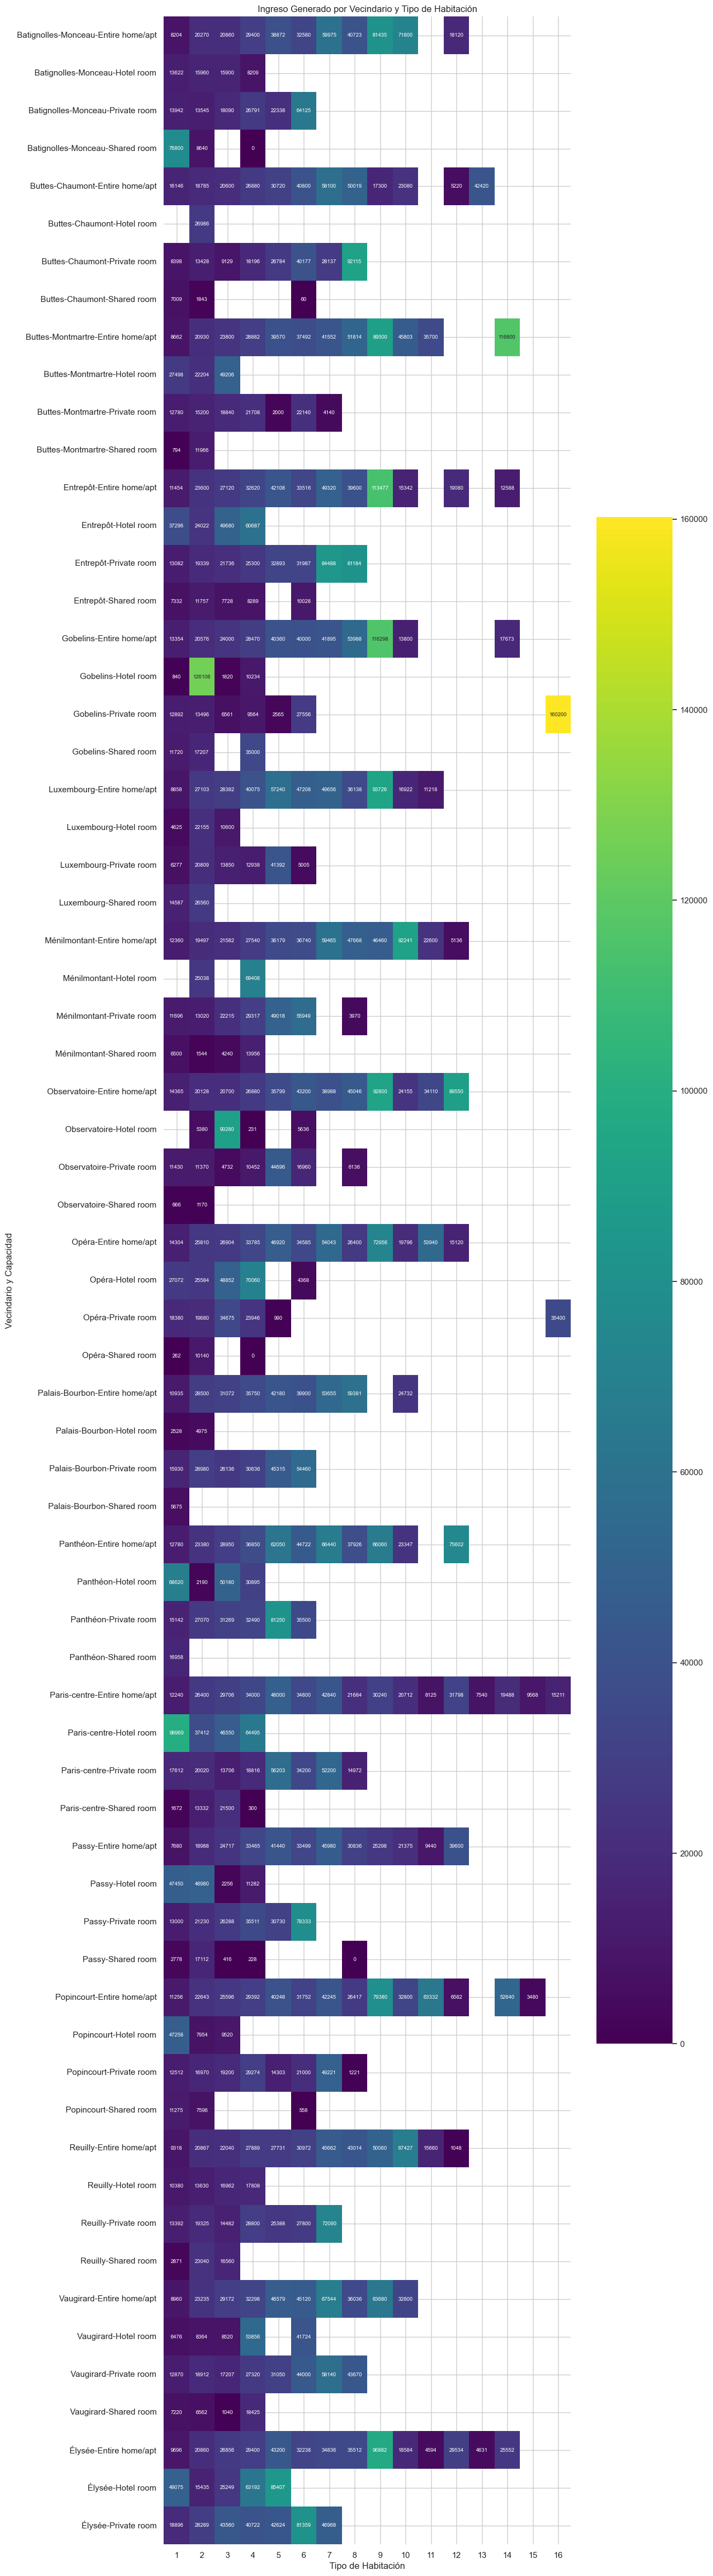

In [164]:
income_contingency = final_df_mod.pivot_table(
    values='income_generated', 
    index=['neighbourhood', 'room_type'],  # Añadir 'accommodate' aquí
    columns='accommodates', 
    aggfunc='median'
)
income_contingency_reset = income_contingency.reset_index()
plt.figure(figsize=(12, 60))
sns.heatmap(income_contingency, annot=True, fmt=".0f", cmap='viridis', annot_kws={"size": 7})
plt.title('Ingreso Generado por Vecindario y Tipo de Habitación')
plt.ylabel('Vecindario y Capacidad')
plt.xlabel('Tipo de Habitación')
plt.show()


Se observa que para los entire home/apt los ingresos más altos se tienen para Luxembourg, Palais-bourbon, Pantheon. Y para los hoteles Menilmontant y Paris-Centre. En ambos se observa que Paris centre es una buena elección. 

#### **4.3-Pruebas-de-hipotesis**

Inicialmente, se desea probar con una prueba One-Way ANOVA para comparar **ingresos por tipo de habitación** y probar si existe al menos un tipo de habitación genera ingresos significativamente diferentes ($H_1$). En dicho caso, se debe probar los supuestos y en cuyo caso no se cumpla alguno de ellos, se debe cambiar de test. En este caso, se sugiere como alternativa el *test* de Kruskal-Wallis que, a diferencia de ANOVA, es una prueba no paramétrica que no asume normalidad. Esto mismo se realizará con **ingresos por tipo de barrio**.

##### **4.3.1-Room-test**

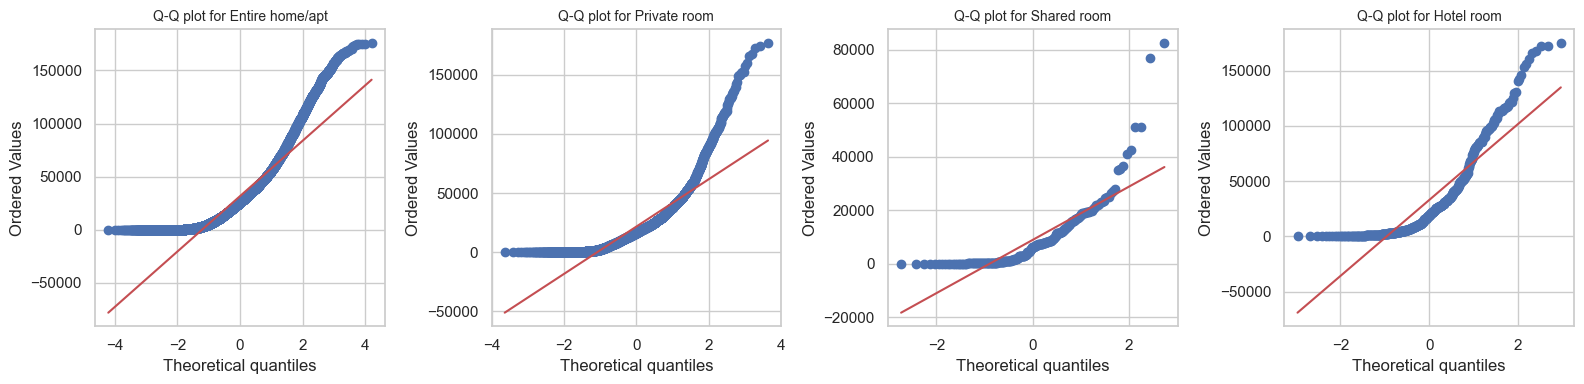

Shapiro-Wilk test p-value for Entire home/apt: 8.870346739445231e-102
Shapiro-Wilk test p-value for Private room: 7.039430197659472e-63
Shapiro-Wilk test p-value for Shared room: 3.632467632065538e-19
Shapiro-Wilk test p-value for Hotel room: 2.5497416905823742e-23
Levene's test p-value: 1.8584600277643875e-119


c:\ProgramData\miniconda3\envs\taller1\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 52512.
  res = hypotest_fun_out(*samples, **kwds)
c:\ProgramData\miniconda3\envs\taller1\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5263.
  res = hypotest_fun_out(*samples, **kwds)


In [121]:
# 1. Normalidad
room_types = final_df_mod['room_type'].unique()
n_room_types = len(room_types)
fig_width = min(4 * n_room_types, 20)
fig_height = 4 * ((n_room_types - 1) // 5 + 1) 

plt.figure(figsize=(fig_width, fig_height))
for i, room_type in enumerate(room_types):
    plt.subplot(((n_room_types - 1) // 5 + 1), min(n_room_types, 5), i+1)
    stats.probplot(final_df_mod[final_df_mod['room_type'] == room_type]['income_generated'], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {room_type}", fontsize=10)
    plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk para cada grupo
for room_type in room_types:
    _, p_value = stats.shapiro(final_df_mod[final_df_mod['room_type'] == room_type]['income_generated'])
    print(f"Shapiro-Wilk test p-value for {room_type}: {p_value}")

# 2. Homogeneidad de varianzas
_, p_value = stats.levene(*[group['income_generated'].values for name, group in final_df_mod.groupby('room_type')])
print(f"Levene's test p-value: {p_value}")

En este caso, dado que en la prueba de normalidad todos los p-values son extremadamente pequeños (< 0.05), esto indica que los ingresos generados para cada tipo de habitación no siguen una distribución normal. Esto viola uno de los supuestos del ANOVA y no se puede hacer este tipo de _test_ y se procede con Kruskal-wallis. Por otro lado, también se viola el supuesto de Homogeneidad de varianzas ya que el p-values (1.86e-119) es mucho menor que 0.05, lo que sugiere que las varianzas de los ingresos generados no son homogéneas entre los diferentes tipos de habitación. 

Kruskal-Wallis Test Results:
H-statistic: 1001.5662828200001
p-value: 8.229205972948093e-217

Dunn's post-hoc test results:
                 Entire home/apt    Hotel room   Private room   Shared room
Entire home/apt     1.000000e+00  1.193802e-03  5.188675e-168  5.054750e-54
Hotel room          1.193802e-03  1.000000e+00   1.744332e-05  5.054259e-26
Private room       5.188675e-168  1.744332e-05   1.000000e+00  1.839665e-20
Shared room         5.054750e-54  5.054259e-26   1.839665e-20  1.000000e+00


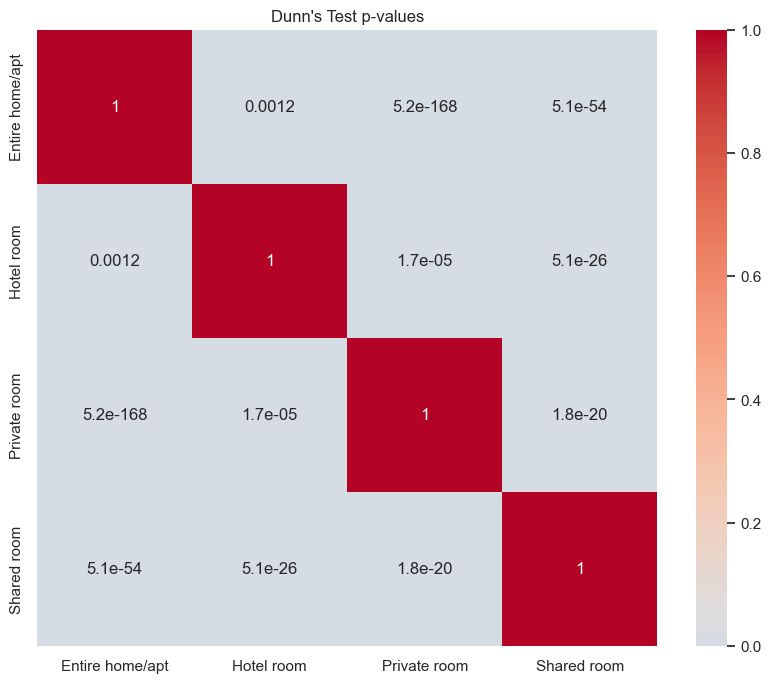

In [114]:
##################################
# Prueba de Kruskal-Wallis
##################################

room_types = final_df_mod['room_type'].unique()
income_groups = [group['income_generated'].values for name, group in final_df_mod.groupby('room_type')]

h_statistic, p_value = stats.kruskal(*income_groups)

print("Kruskal-Wallis Test Results:")
print(f"H-statistic: {h_statistic}")
print(f"p-value: {p_value}")

##################################
# Comparaciones post-hoc de Dunn
##################################

if p_value < 0.05:
    dunn_results = posthoc_dunn(final_df_mod, val_col='income_generated', group_col='room_type', p_adjust='bonferroni')
    
    print("\nDunn's post-hoc test results:")
    print(dunn_results)

    # Visualización de los resultados de Dunn
    plt.figure(figsize=(10, 8))
    sns.heatmap(dunn_results, annot=True, cmap='coolwarm', center=0.05)
    plt.title("Dunn's Test p-values")
    plt.show()
    

Con el valor obtenido, el p-value es extremadamente pequeño (mucho menor que 0.05), lo que indica que hay diferencias estadísticamente significativas en los ingresos generados entre los diferentes tipos de habitación. Por lo tanto, se rechaza la hipótesis nula de que todos los grupos tienen la misma distribución de ingresos. Además, las comparaciones entre los distintos tipos de habitación, dan inferiores al nivel de significancia por lo que sí hay diferencia entre los ingresos obtenidos.

##### **4.3.2-Neighborhood-test**

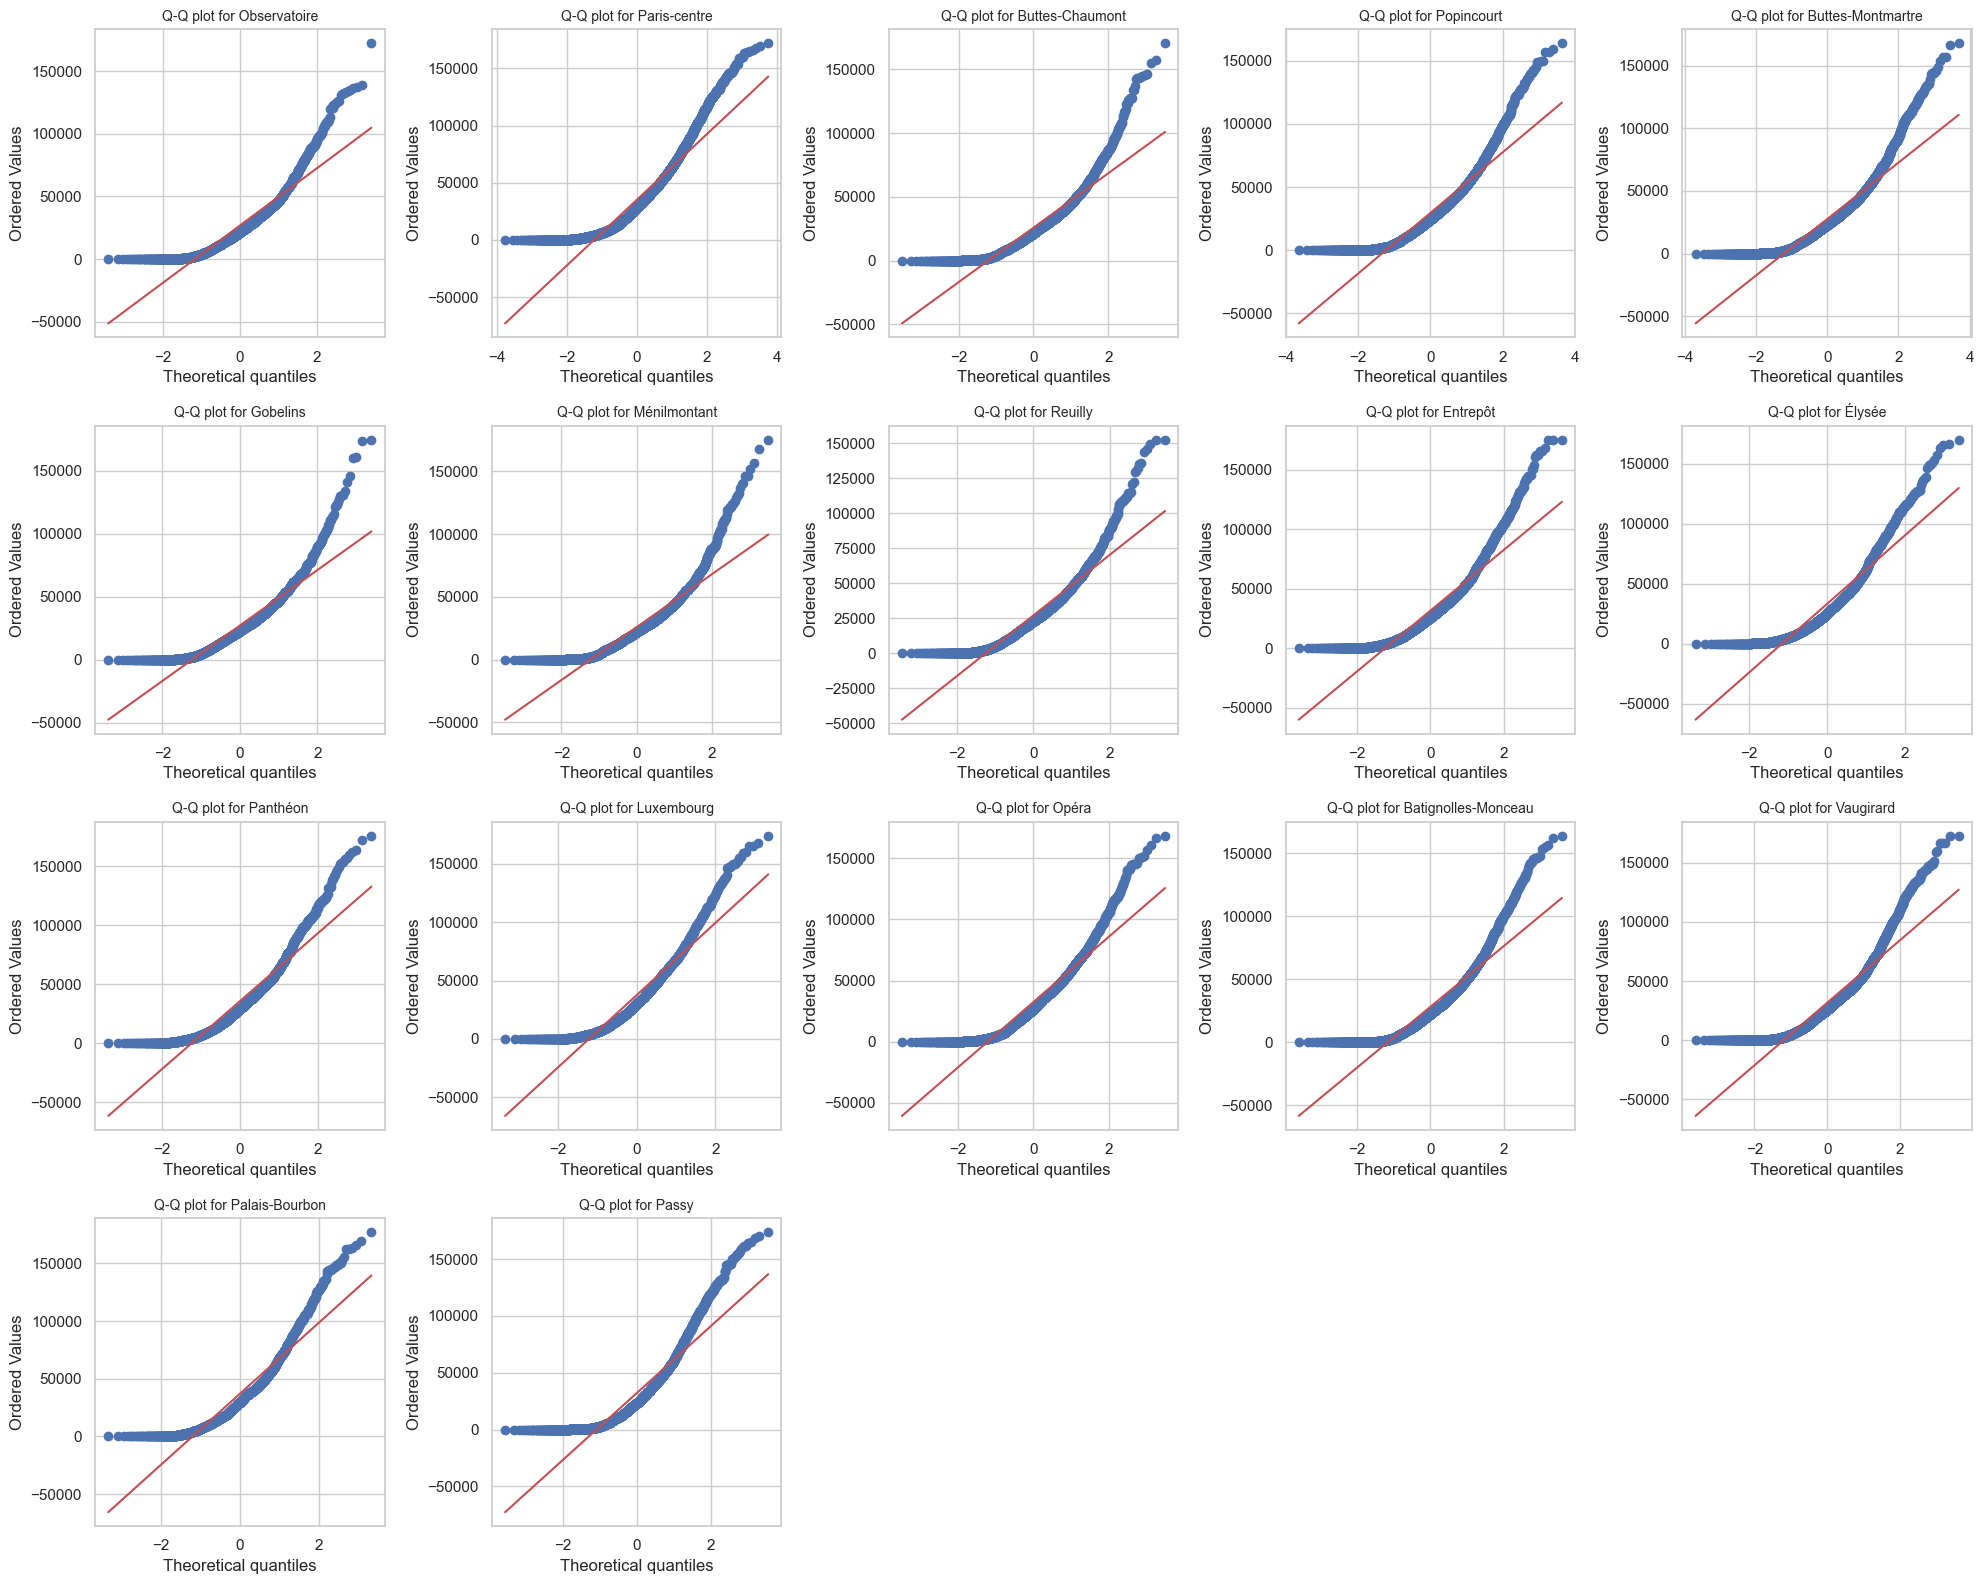

Shapiro-Wilk test p-value for Observatoire: 5.1103339712676105e-40
Shapiro-Wilk test p-value for Paris-centre: 2.9790161472529178e-59
Shapiro-Wilk test p-value for Buttes-Chaumont: 2.6788183293151308e-45
Shapiro-Wilk test p-value for Popincourt: 2.7236284492128796e-51
Shapiro-Wilk test p-value for Buttes-Montmartre: 3.6748430334716566e-56
Shapiro-Wilk test p-value for Gobelins: 3.5151078059045287e-37
Shapiro-Wilk test p-value for Ménilmontant: 8.908908768698549e-45
Shapiro-Wilk test p-value for Reuilly: 6.535158420763299e-39
Shapiro-Wilk test p-value for Entrepôt: 1.4939867602194133e-47
Shapiro-Wilk test p-value for Élysée: 3.2435015628645557e-36
Shapiro-Wilk test p-value for Panthéon: 2.7605356007187952e-34
Shapiro-Wilk test p-value for Luxembourg: 3.51635285578532e-32
Shapiro-Wilk test p-value for Opéra: 3.3876886026714355e-40
Shapiro-Wilk test p-value for Batignolles-Monceau: 1.1314689922492078e-49
Shapiro-Wilk test p-value for Vaugirard: 2.0790195335594015e-51
Shapiro-Wilk test p-v

c:\ProgramData\miniconda3\envs\taller1\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8082.
  res = hypotest_fun_out(*samples, **kwds)
c:\ProgramData\miniconda3\envs\taller1\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5026.
  res = hypotest_fun_out(*samples, **kwds)
c:\ProgramData\miniconda3\envs\taller1\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6185.
  res = hypotest_fun_out(*samples, **kwds)


In [123]:
# 1. Normalidad
neighborhood_types = final_df_mod['neighbourhood'].unique()
n_neighborhood_types = len(neighborhood_types)
fig_width = min(4 * n_neighborhood_types, 20)
fig_height = 4 * ((n_neighborhood_types - 1) // 5 + 1) 

plt.figure(figsize=(fig_width, fig_height))
for i, neighborhood_type in enumerate(neighborhood_types):
    plt.subplot(((n_neighborhood_types - 1) // 5 + 1), min(n_neighborhood_types, 5), i+1)
    stats.probplot(final_df_mod[final_df_mod['neighbourhood'] == neighborhood_type]['income_generated'], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {neighborhood_type}", fontsize=10)
    plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk para cada grupo
for neighborhood_type in neighborhood_types:
    _, p_value = stats.shapiro(final_df_mod[final_df_mod['neighbourhood'] == neighborhood_type]['income_generated'])
    print(f"Shapiro-Wilk test p-value for {neighborhood_type}: {p_value}")

# 2. Homogeneidad de varianzas
_, p_value = stats.levene(*[group['income_generated'].values for name, group in final_df_mod.groupby('neighbourhood')])
print(f"Levene's test p-value: {p_value}")

En el caso de los barrios sucede lo mismo que con el tipo de habitación y es que todos los p-values del test de Shapiro-Wilk son extremadamente bajos (menores que 0.05), lo que indica que los datos no siguen una distribución normal. Además, el p-value del test de Levene también es muy bajo (menor que 0.05), lo que sugiere que  las varianzas entre los grupos son diferentes. En este caso tampoco se puede hacer anova y se prosigue con Kruskal.

Kruskal-Wallis Test Results:
H-statistic: 626.8963123724852
p-value: 4.4843701776784436e-123

Dunn's post-hoc test results:
                     Batignolles-Monceau  Buttes-Chaumont  Buttes-Montmartre  \
Batignolles-Monceau         1.000000e+00     1.000000e+00       1.000000e+00   
Buttes-Chaumont             1.000000e+00     1.000000e+00       3.833739e-01   
Buttes-Montmartre           1.000000e+00     3.833739e-01       1.000000e+00   
Entrepôt                    2.288027e-07     1.989991e-13       9.934791e-08   
Gobelins                    1.000000e+00     1.000000e+00       1.000000e+00   
Luxembourg                  4.788882e-21     6.815630e-28       5.620789e-22   
Ménilmontant                1.000000e+00     1.000000e+00       1.000000e+00   
Observatoire                1.000000e+00     1.000000e+00       1.000000e+00   
Opéra                       7.580087e-10     4.694463e-16       2.593909e-10   
Palais-Bourbon              5.146347e-18     1.854047e-24       1.151469e-18

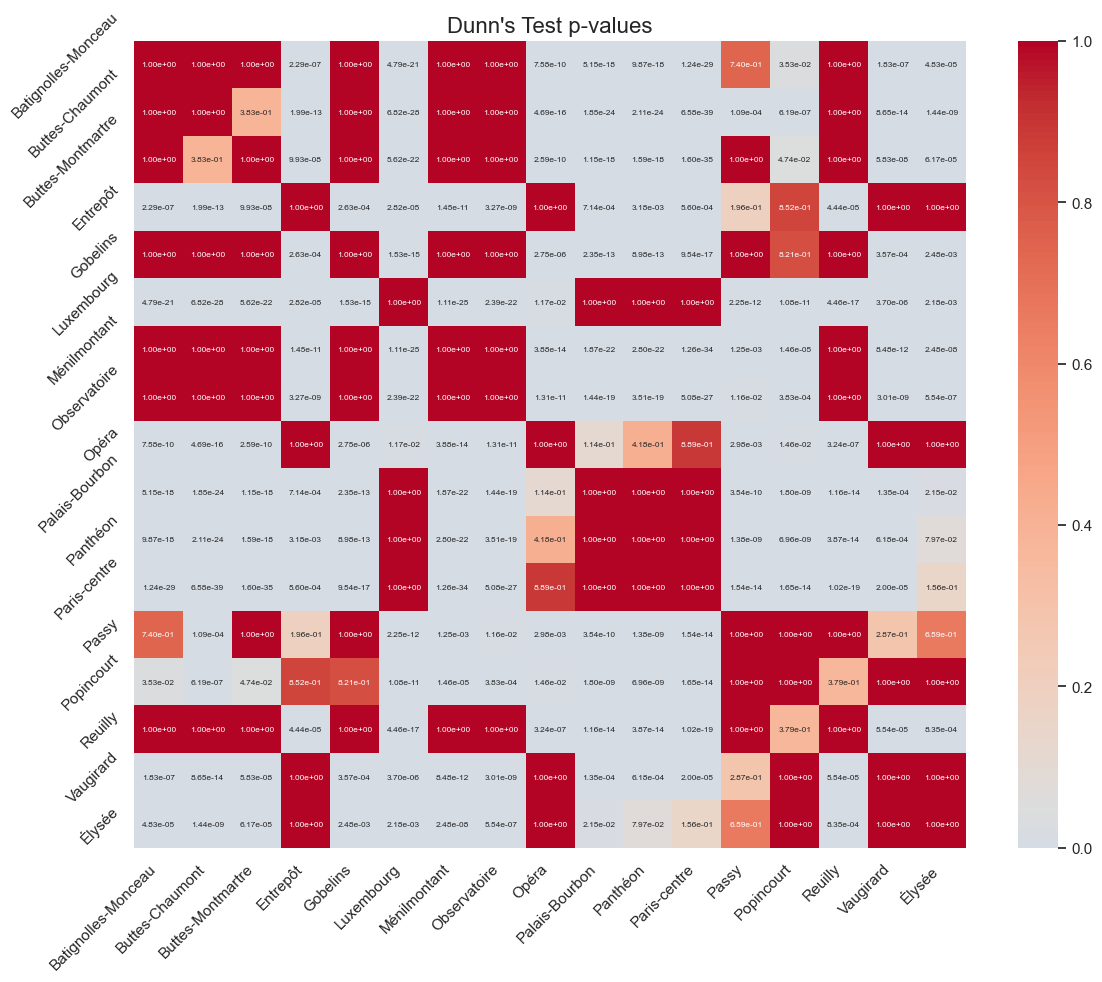

In [130]:
##################################
# Prueba de Kruskal-Wallis
##################################

neighbourhoods = final_df_mod['neighbourhood'].unique()
income_groups = [group['income_generated'].values for name, group in final_df_mod.groupby('neighbourhood')]

h_statistic, p_value = stats.kruskal(*income_groups)

print("Kruskal-Wallis Test Results:")
print(f"H-statistic: {h_statistic}")
print(f"p-value: {p_value}")

##################################
# Comparaciones post-hoc de Dunn
##################################

if p_value < 0.05:
    dunn_results = posthoc_dunn(final_df_mod, val_col='income_generated', group_col='neighbourhood', p_adjust='bonferroni')
    
    print("\nDunn's post-hoc test results:")
    print(dunn_results)

    plt.figure(figsize=(12, 10))
    sns.heatmap(dunn_results, annot=True, fmt=".2e", cmap='coolwarm', center=0.05, 
                annot_kws={"size": 6})  # Cambia el tamaño de las anotaciones
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.title("Dunn's Test p-values", fontsize=16)
    plt.tight_layout() 
    plt.show()




Con el valor obtenido, el p-value es extremadamente pequeño (mucho menor que 0.05), lo que indica que hay diferencias estadísticamente significativas en los ingresos generados entre los diferentes barrios. Por lo tanto, se rechaza la hipótesis nula de que todos los grupos tienen la misma distribución de ingresos. Además, las comparaciones entre los distintos barrios en su mayoría (como se ve en la matriz), dan inferiores al nivel de significancia por lo que sí hay diferencia entre los ingresos obtenidos.

##### **4.3.3-Accommodates-test**

En el caso de dos variables numéricas, se analizará si está relacionado a través de pruebas de correlación. Inicialmente, también se verificará por normalidad y, dependiendo de ello, se utilizará el coeficiente de Pearson o de Spearman.

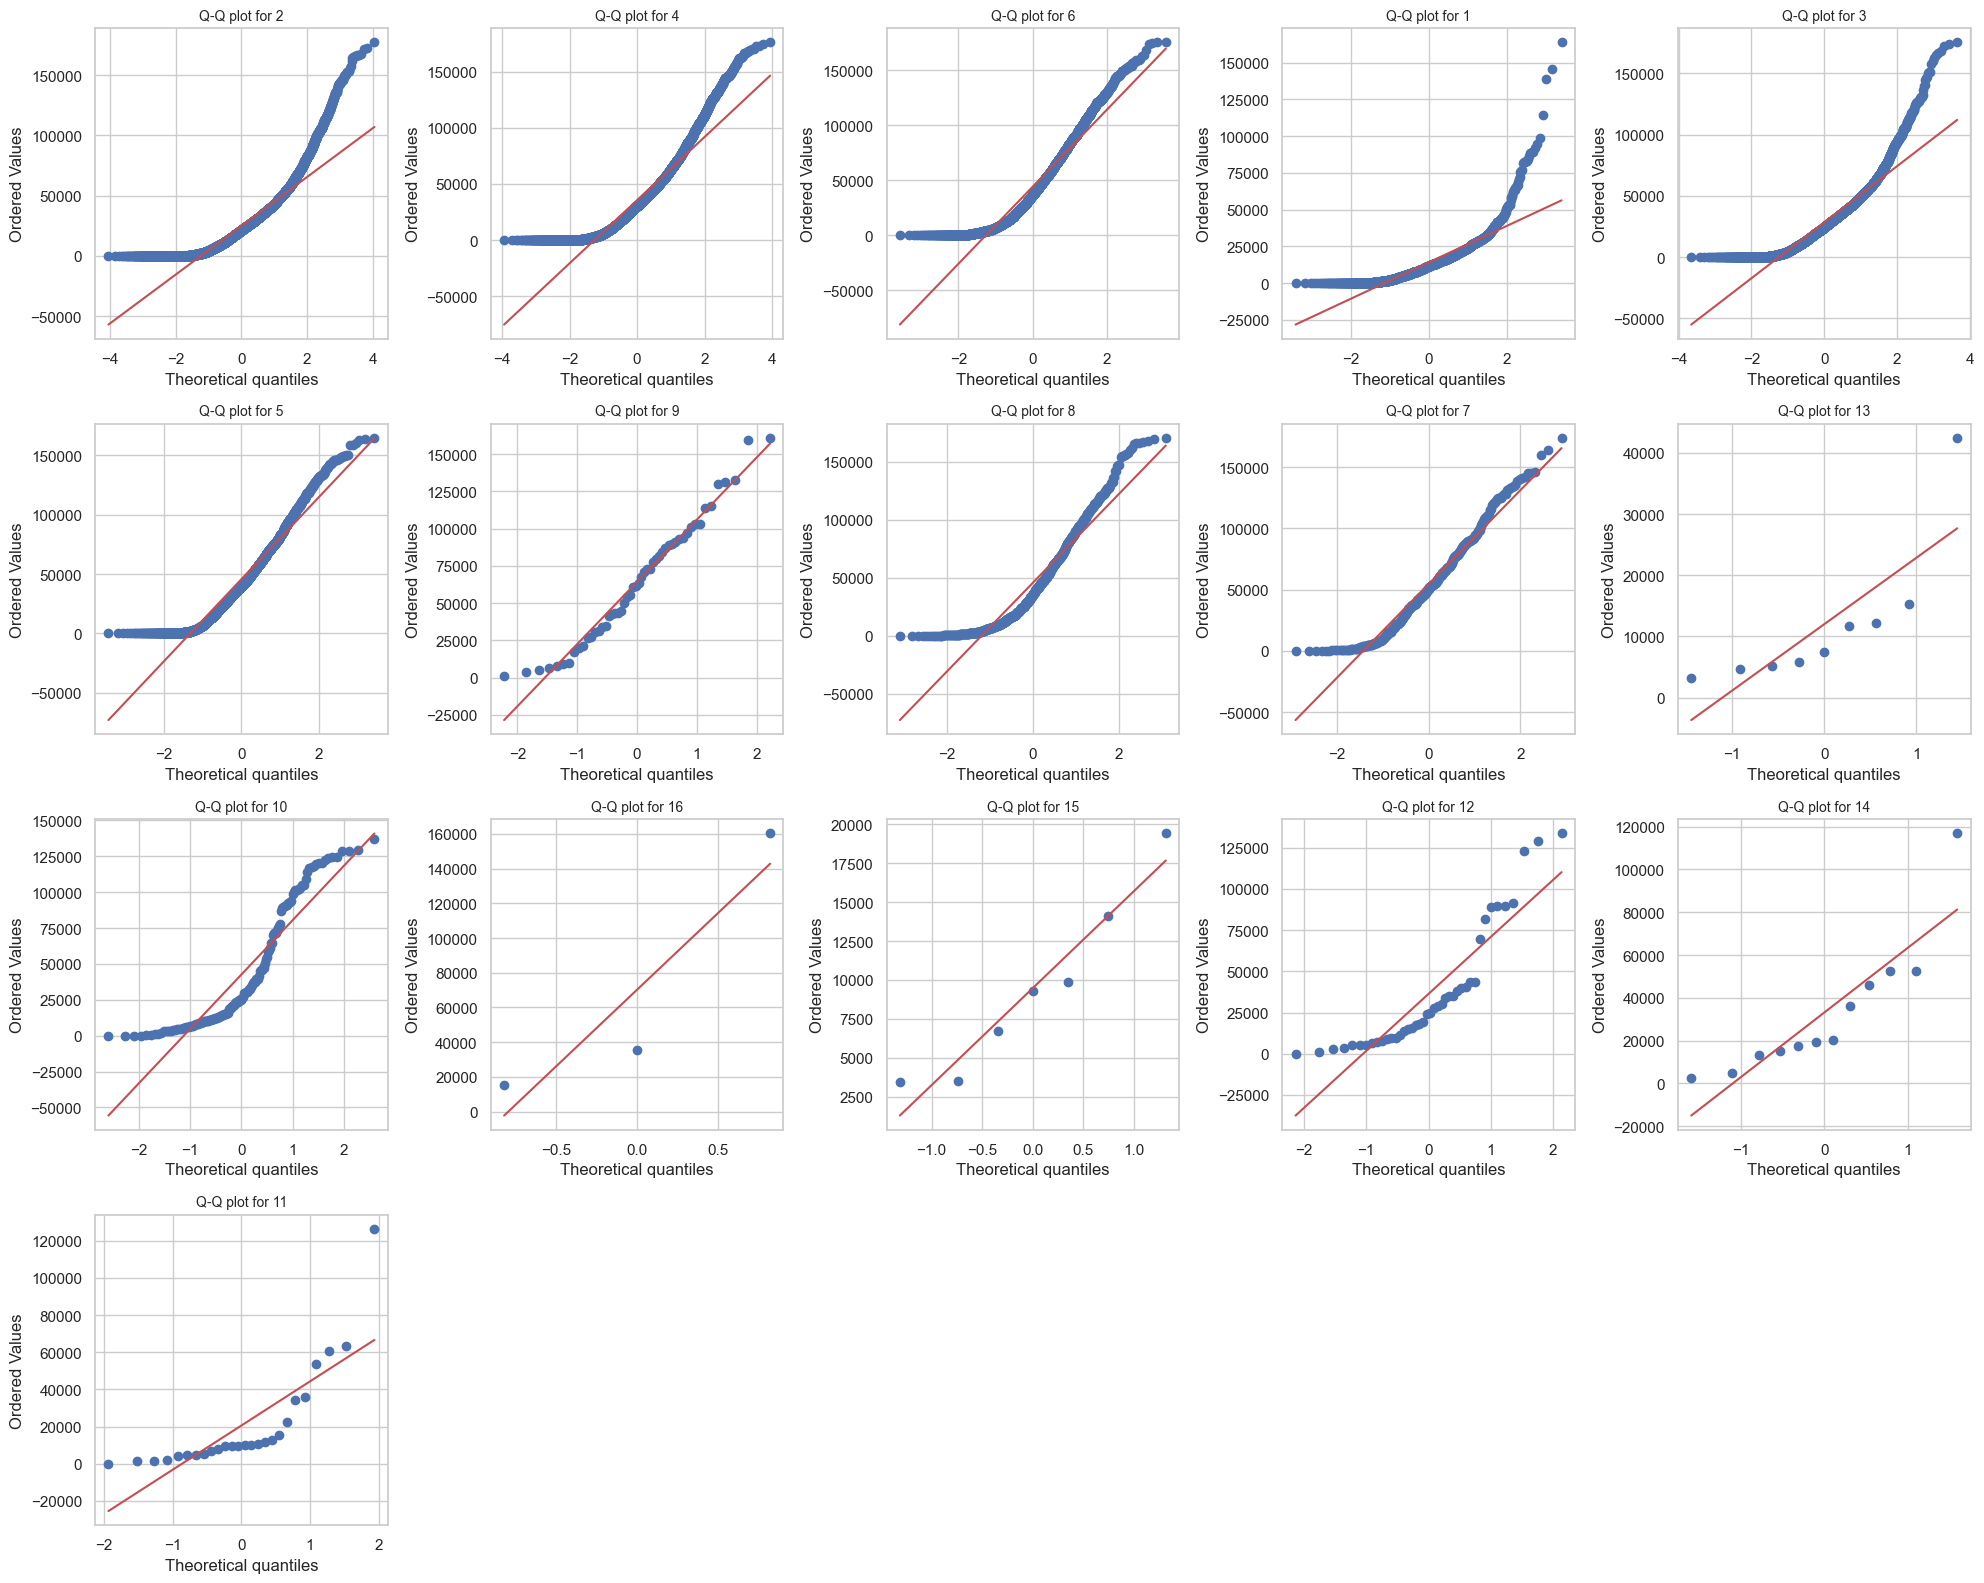

Shapiro-Wilk test p-value for 2: 8.88522642698988e-87
Shapiro-Wilk test p-value for 4: 3.887943990002813e-70
Shapiro-Wilk test p-value for 6: 3.416264597820385e-41
Shapiro-Wilk test p-value for 1: 1.0000171103797061e-47
Shapiro-Wilk test p-value for 3: 1.775293859290296e-52
Shapiro-Wilk test p-value for 5: 2.369225985651952e-29
Shapiro-Wilk test p-value for 9: 0.12941762595466183
Shapiro-Wilk test p-value for 8: 5.738389036382407e-21
Shapiro-Wilk test p-value for 7: 5.477098858545769e-09
Shapiro-Wilk test p-value for 13: 0.0011265750650071818
Shapiro-Wilk test p-value for 10: 5.211737306691567e-11
Shapiro-Wilk test p-value for 16: 0.24617167957629082
Shapiro-Wilk test p-value for 15: 0.5099731651924028
Shapiro-Wilk test p-value for 12: 9.056191737240113e-06
Shapiro-Wilk test p-value for 14: 0.011939756019505253
Shapiro-Wilk test p-value for 11: 2.064099612112949e-06


In [135]:
# 1. Normalidad
accommodates_types = final_df_mod['accommodates'].unique()
n_accommodates_types = len(accommodates_types)
fig_width = min(4 * n_accommodates_types, 20)
fig_height = 4 * ((n_accommodates_types - 1) // 5 + 1) 

plt.figure(figsize=(fig_width, fig_height))
for i, accommodates_type in enumerate(accommodates_types):
    plt.subplot(((n_accommodates_types - 1) // 5 + 1), min(n_accommodates_types, 5), i+1)
    stats.probplot(final_df_mod[final_df_mod['accommodates'] == accommodates_type]['income_generated'], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {accommodates_type}", fontsize=10)
    plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk para cada grupo
for accommodates_type in accommodates_types:
    _, p_value = stats.shapiro(final_df_mod[final_df_mod['accommodates'] == accommodates_type]['income_generated'])
    print(f"Shapiro-Wilk test p-value for {accommodates_type}: {p_value}")

Dado que la mayoría de valores no satisfacen una distribución normal, se utilizará la prueba de spearman

In [144]:
corr_spearman, p_value = spearmanr(final_df_mod['income_generated'], final_df_mod['accommodates'])
print(f'Spearman correlation: {corr_spearman}, p-value: {p_value}')


Spearman correlation: 0.23364614282881793, p-value: 0.0


Existe una correlación débil entre ambas variables dado que el p-value es menor al nivel de significancia.

Finalmente, se observa que los mejores lugares de inversión son:
1. Aquellos que son Entire apt y/o hoteles
2. Gobelins y Ménilmontant tienen las tasas de ocupación más altas, con una mediana de 0.57 y una media de 0.54. Esto sugiere que estos barrios tienen un buen nivel de demanda. Además, Panthéon y Entrepôt también muestran tasas de ocupación sólidas, con medianas de 0.55 y 0.56 respectivamente, indicando que estos son lugares con buena actividad de inquilinos. Además, se observa que Luxembourg y Palais-Bourbon son los barrios con los ingresos más altos, con una mediana de alrededor de 30,000 euros y una media cercana a 37,000 euros. Por otro lado, Panthéon y Paris-centre presentan ingresos robustos, con medianas alrededor de 28,000-29,000 euros. Son buenos candidatos para inversión, ya que están ubicados en áreas centrales y populares.
3. En términos de número de personas los que presentan más ingresos son 7 y 9. 

Ya combinando los ingresos con los barrios y tipo de habitación, aquellos que presentan buenos ingresos son:

- Luxembourg, Palais-Bourbon, Panthéon, Paris-centre con Entire apt
- Ménilmontant, Paris-Centre y Passy para hoteles

En estos por tipo de acomodación los que presentan mejores ingresos son:
- Luxembourg/Entire apt: 5 personas (57240 eur) y 9 personas (93726 eur)
- Palais-Bourbon/Entire apt: 7 personas (53655 eur) y 8 personas (59381 eur)
- Panthéon/Entire apt: 7 personas (66440 eur) y 12 personas (75602 eur)
- Paris-centre/Entire apt: 5 personas (48000 eur) y 7 personas (42840 eur)
- Ménilmontant/Hotel: 4 personas (69408 eur)
- Paris-centre/Hotel:1 persona (98969 eur) y 4 personas (64495 eur)
- Passy/Hotel: 1 persona (47450 eur) y 2 personas (48980 eur)

Este fue un approach top down en el que se fueron añadiendo la totalidad de las variables. Si bien, ya en el análisis de 4 variables que hay lugares con una cantidad especifica de huéspedes que les va mejor, la mediana al únicamente compara la zona y el tipo de habitación, indica que esos son los barrios con un ingreso mediano en el que valdría la pena invertir. En particular, el top tres termina siendo:

1. Paris-centre/Hotel (1 persona): 98969 eur
2. Luxembourg/Entire apt ( 9 personas): 93726 eur
3. Panthéon/Entire apt (12 personas): 75602 eur